In [1]:
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display, clear_output

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
path_results = os.path.join(os.getcwd(), '..', 'AirPollution_Run')
models = os.listdir(path_results)

print('Number of models available: ', len(models))
print()

for i, model in enumerate(models):
    print(i, model)

Number of models available:  8

0 Split_Images_Max_Time_23_hours
1 Full_Images_200_epochs
2 Full_Images_200_epochs_Charbonier
3 Full_Images_200_epochs_Charbonier_LR_1p5e-5
4 Full_Images_200_epochs_Hubber
5 Full_Images_200_epochs_Charbonier_Gradient
6 Full_Images_200_epochs_MAE
7 Full_Images_200_epochs_PixelShuffle


In [3]:
mse = os.path.join(path_results, models[1], 'output', 'metrics', 'valid')
mae = os.path.join(path_results, models[6], 'output', 'metrics', 'valid')
hubber = os.path.join(path_results, models[4], 'output', 'metrics', 'valid')
charb = os.path.join(path_results, models[2], 'output', 'metrics', 'valid')
charb_grad = os.path.join(path_results, models[5], 'output', 'metrics', 'valid')
#ls_2 = os.path.join(path_results, models[3], 'output', 'metrics', 'valid')
#ps = os.path.join(path_results, models[7], 'output', 'metrics', 'valid')

print(mse.split('/')[-3])
print(mae.split('/')[-3])
print(hubber.split('/')[-3])
print(charb.split('/')[-3])
print(charb_grad.split('/')[-3])
#print(ls_2.split('/')[-3])
#print(ps.split('/')[-3])

metrics_mse = pd.read_csv(os.path.join(mse, 'metrics.csv'))
metrics_mae = pd.read_csv(os.path.join(mae, 'metrics.csv'))
metrics_hubber = pd.read_csv(os.path.join(hubber, 'metrics.csv'))
metrics_charb = pd.read_csv(os.path.join(charb, 'metrics.csv'))
metrics_charb_grad = pd.read_csv(os.path.join(charb_grad, 'metrics.csv'))
#metrics_ls_2 = pd.read_csv(os.path.join(ls_2, 'metrics.csv'))
#metrics_ps = pd.read_csv(os.path.join(ps, 'metrics.csv'))

# Remove the last columns, which doesn't make sense
metrics_mse.drop('Unnamed: 12', axis=1, inplace=True)
#metrics_mae.drop('Unnamed: 12', axis=1, inplace=True)
metrics_hubber.drop('Unnamed: 12', axis=1, inplace=True)
metrics_charb.drop('Unnamed: 12', axis=1, inplace=True)
metrics_charb_grad.drop('Unnamed: 12', axis=1, inplace=True)
#metrics_ls_2.drop('Unnamed: 12', axis=1, inplace=True)
#metrics_ps.drop('Unnamed: 12', axis=1, inplace=True)

# Set Epoch column as index
metrics_mse.set_index('Epoch', inplace=True)
metrics_mae.set_index('Epoch', inplace=True)
metrics_hubber.set_index('Epoch', inplace=True)
metrics_charb.set_index('Epoch', inplace=True)
metrics_charb_grad.set_index('Epoch', inplace=True)
#metrics_ls_2.set_index('Epoch', inplace=True)
#metrics_ps.set_index('Epoch', inplace=True)

output
output
output
output
output


metrics_mae

In [4]:
metrics_mse.head()

l1Error_total  l2Error_total  Bias_time  Bias_space  Corr_time  \
Epoch                                                                   
0           2.095498      14.911235  -0.133040   -0.133040   0.663536   
1           1.933132      14.263380  -0.936617   -0.936617   0.712640   
2           1.826308      11.619192   0.137387    0.137387   0.725844   
3           2.120786      12.955717   1.028526    1.028526   0.736617   
4           1.710225      10.733176  -0.240603   -0.240603   0.738520   

       Corr_space  RMSE_time  RMSE_space  PeakSignalNoiseRatio  \
Epoch                                                            
0        0.806428   2.964614    3.586904             39.542786   
1        0.836764   2.854002    3.447515             39.735699   
2        0.852656   2.609227    3.157363             40.626167   
3        0.853294   2.826132    3.343892             40.153309   
4        0.868680   2.505324    3.005752             40.970638   

       StructuralSimilarityIndexMeasure  UniversalImageQualityIndex  
Epoch                                                                
0                              0.934622                    0.088988  
1                              0.941579                    0.166392  
2                              0.950955                    0.148423  
3                              0.936678                    0.181717  
4                              0.955342                    0.189607

In [5]:
metrics_mae.head()

l1Error_total  l2Error_total  Bias_time  Bias_space  Corr_time  \
Epoch                                                                   
0           1.926328      16.723124  -0.583203   -0.583203   0.703200   
1           1.840937      15.846782  -0.863205   -0.863206   0.728299   
2           1.713660      13.226583  -0.621422   -0.621422   0.758484   
3           1.687475      12.862959   0.029284    0.029284   0.771236   
4           1.632873      12.229799  -0.442915   -0.442915   0.772968   

       Corr_space  RMSE_time  RMSE_space  PeakSignalNoiseRatio  \
Epoch                                                            
0        0.808417   2.908390    3.697495             39.044750   
1        0.833827   2.832380    3.582816             39.278515   
2        0.846661   2.605590    3.264132             40.063446   
3        0.849938   2.513886    3.189568             40.184513   
4        0.867074   2.483440    3.123754             40.403728   

       StructuralSimilarityIndexMeasure  UniversalImageQualityIndex  
Epoch                                                                
0                              0.947783                    0.127827  
1                              0.952534                    0.158720  
2                              0.956568                    0.185220  
3                              0.959400                    0.196170  
4                              0.960755                    0.232707

In [6]:
metrics_hubber.head()

l1Error_total  l2Error_total  Bias_time  Bias_space  Corr_time  \
Epoch                                                                   
0           2.016788      16.686235  -0.699305   -0.699305   0.652648   
1           1.880616      15.555448  -0.695436   -0.695436   0.735790   
2           1.882779      13.058558  -1.046008   -1.046008   0.748257   
3           1.819138      12.073694   0.496378    0.496378   0.759896   
4           1.688486      10.846980   0.170308    0.170308   0.767691   

       Corr_space  RMSE_time  RMSE_space  PeakSignalNoiseRatio  \
Epoch                                                            
0        0.801627   3.018392    3.708329             39.054337   
1        0.830883   2.834131    3.552053             39.359097   
2        0.854280   2.757519    3.297047             40.118969   
3        0.860366   2.558949    3.137389             40.459522   
4        0.873968   2.425173    2.977751             40.924835   

       StructuralSimilarityIndexMeasure  UniversalImageQualityIndex  
Epoch                                                                
0                              0.938303                    0.129313  
1                              0.949670                    0.174385  
2                              0.941175                    0.164475  
3                              0.951499                    0.195935  
4                              0.956909                    0.213774

In [7]:
metrics_charb.head()

l1Error_total  l2Error_total  Bias_time  Bias_space  Corr_time  \
Epoch                                                                   
0           1.926130      16.719070  -0.581906   -0.581906   0.703284   
1           1.839568      15.832552  -0.859805   -0.859805   0.728391   
2           1.713588      13.226295  -0.619738   -0.619738   0.758288   
3           1.685086      12.852431   0.024769    0.024769   0.771603   
4           1.636744      12.222691  -0.417285   -0.417285   0.772008   

       Corr_space  RMSE_time  RMSE_space  PeakSignalNoiseRatio  \
Epoch                                                            
0        0.808459   2.907879    3.697058             39.045799   
1        0.834010   2.831048    3.580999             39.282413   
2        0.846657   2.605415    3.263993             40.063541   
3        0.850121   2.511559    3.187919             40.188068   
4        0.866589   2.483428    3.123752             40.406254   

       StructuralSimilarityIndexMeasure  UniversalImageQualityIndex  
Epoch                                                                
0                              0.947788                    0.128225  
1                              0.952607                    0.158660  
2                              0.956592                    0.183154  
3                              0.959477                    0.202006  
4                              0.960559                    0.232120

In [8]:
metrics_charb_grad.head()

l1Error_total  l2Error_total  Bias_time  Bias_space  Corr_time  \
Epoch                                                                   
0           1.919272      16.790964  -0.719350   -0.719350   0.702886   
1           1.881876      16.584387  -1.038350   -1.038350   0.725212   
2           1.726958      13.467986  -0.728038   -0.728038   0.760620   
3           1.698600      12.885054   0.071583    0.071583   0.769980   
4           1.629529      12.263329  -0.364368   -0.364368   0.779444   

       Corr_space  RMSE_time  RMSE_space  PeakSignalNoiseRatio  \
Epoch                                                            
0        0.806777   2.918711    3.706804             39.027168   
1        0.831717   2.906222    3.668378             39.080925   
2        0.846116   2.629069    3.293290             39.984898   
3        0.848756   2.523482    3.199776             40.177059   
4        0.866587   2.468610    3.127146             40.391838   

       StructuralSimilarityIndexMeasure  UniversalImageQualityIndex  
Epoch                                                                
0                              0.947487                    0.127241  
1                              0.949926                    0.159237  
2                              0.955663                    0.181285  
3                              0.958933                    0.210671  
4                              0.961162                    0.241347

In [9]:
print(metrics_mse.shape)
print(metrics_mae.shape)
print(metrics_hubber.shape)
print(metrics_charb.shape)
print(metrics_charb_grad.shape)


(200, 11)
(200, 11)
(200, 11)
(200, 11)
(200, 11)


In [10]:
metrics_charb.columns

Index(['l1Error_total', 'l2Error_total', 'Bias_time', 'Bias_space',
       'Corr_time', 'Corr_space', 'RMSE_time', 'RMSE_space',
       'PeakSignalNoiseRatio', 'StructuralSimilarityIndexMeasure',
       'UniversalImageQualityIndex'],
      dtype='object')

In [11]:
metrics_list = [metrics_mse, metrics_mae, metrics_hubber, metrics_charb, metrics_charb_grad]

assert all(np.array_equal(metrics_list[0].columns, df.columns) for df in metrics_list), "Error. Not all DataFrames have the same metrics calculated"

#### Persistence Values

In [12]:
valid_persistence = {
    "l1Error_total": 1.0647764205932617,
    "l1Error_spain": 0.7586907148361206,
    "l2Error_total": 2.424663782119751,
    "l2Error_spain": 1.1358221769332886,
    "Bias_time": -0.017817959189414978,
    "Bias_time_spain": 0.03300584852695465,
    "Bias_space": -0.017817959189414978,
    "Bias_space_spain": 0.03300585225224495,
    "Corr_time": 0.6928690671920776,
    "Corr_time_spain": 0.6911803483963013,
    "Corr_space": 0.8294578194618225,
    "Corr_space_spain": 0.6812140941619873,
    "RMSE_time": 1.4718365669250488,
    "RMSE_time_spain": 1.047203540802002,
    "RMSE_space": 1.4468573331832886,
    "RMSE_space_spain": 0.9608618021011353,
    "StructuralSimilarityIndexMeasure": 0.7511341571807861,
    "UniversalImageQualityIndex": 0.46750999987125397,
    "PeakSignalNoiseRatio": 0.46750999987125397
}

#### Condition to optimize metrics

In [13]:
optim_condition = {
    'l1Error_total': 'min', 
    'l1Error_spain': 'min', 
    'l2Error_total': 'min', 
    'l2Error_spain': 'min', 
    'Bias_time': 'min', 
    'Bias_time_spain': 'min', 
    'Bias_space': 'min', 
    'Bias_space_spain': 'min',
    'Corr_time': 'max', 
    'Corr_time_spain': 'max', 
    'Corr_space': 'max', 
    'Corr_space_spain': 'max',
    'RMSE_time': 'min', 
    'RMSE_time_spain': 'min', 
    'RMSE_space': 'min', 
    'RMSE_space_spain': 'min',
    'StructuralSimilarityIndexMeasure': 'max', 
    'UniversalImageQualityIndex': 'max',
    'PeakSignalNoiseRatio': 'max'
}

#### Open the PDF file

In [14]:
pdf = PdfPages(os.path.join('Loss_Comparison.pdf'))

In [15]:
def plot_all_metrics(df):
    plt.figure(figsize=(10, 5))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'navy', 'gold', 'teal', 'indigo']
    markers = ['o', 'x', 's', 'd', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'D', '|', '_', '1', '2', '3']

    for i, col in enumerate(df.columns):
        plt.plot(df.index, df[col], label=f'{col}', color=colors[i], marker=markers[i])

    # Añadir título y etiquetas
    plt.title('All metrics vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend(fontsize=6)

    plt.grid(True)

    pdf.savefig()

In [16]:
def plot_two_metrics(df, num1, num2, pers1, pers2, mode='min'):

    columns = df.columns
    
    var1 = columns[num1]
    var2 = columns[num2]

    # Find the minimum/maximum of that metric
    if mode == 'min':
        epoch_1 = df[var1].abs().idxmin()
        value_1 = df[var1].abs().min()
        epoch_2 = df[var2].abs().idxmin()
        value_2 = df[var2].abs().min()

    elif mode == 'max':
        epoch_1 = df[var1].abs().idxmax()
        value_1 = df[var1].abs().max()
        epoch_2 = df[var2].abs().idxmax()
        value_2 = df[var2].abs().max()

    else:
        epoch_1 = 0
        value_1 = 0
        epoch_2 = 0
        value_2 = 0

    plt.figure(figsize=(10, 5))

    plt.plot(df.index, df[var1], label=f'{var1} (Min/Max Epoch: {epoch_1})', marker='.', color='orange')
    plt.plot(df.index, df[var2], label=f'{var2} (Min/Max Epoch: {epoch_2})', marker='.', color='blue')

    # Add vertical lines where the minimum is found
    plt.axvline(x=epoch_1, color='orange', linestyle='--')
    plt.axvline(x=epoch_2, color='blue', linestyle='--')

    # Add horizontal lines for the persistence value
    plt.axhline(y=pers1, color='orange', linestyle='-', label=f'Persistence {var1}')
    plt.axhline(y=pers2, color='blue', linestyle='-', label=f'Persistence {var2}')

    plt.text(epoch_1, value_1, f'{value_1:.4f}', color='orange', ha='right')
    plt.text(epoch_2, value_2, f'{value_2:.4f}', color='blue', ha='right')

    plt.title(f'{columns[num1]} and {columns[num2]} vs Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend()

    plt.grid(True)

    pdf.savefig()

In [31]:
def comparison(data3, data6, data9, data12, data15, num, pers, mode='min', add_persistence=False):

    columns = data3.columns
    var = columns[num]

    # Find the minimum/maximum of that metric
    if mode == 'min':
        epoch_3 = data3[var].abs().idxmin()
        value_3 = data3[var].abs().min()

        epoch_6 = data6[var].abs().idxmin()
        value_6 = data6[var].abs().min()

        epoch_9 = data9[var].abs().idxmin()
        value_9 = data9[var].abs().min()

        epoch_12 = data12[var].abs().idxmin()
        value_12 = data12[var].abs().min()

        epoch_15 = data15[var].abs().idxmin()
        value_15 = data15[var].abs().min()

    elif mode == 'max':
        epoch_3 = data3[var].abs().idxmax()
        value_3 = data3[var].abs().max()

        epoch_6 = data6[var].abs().idxmax()
        value_6 = data6[var].abs().max()

        epoch_9 = data9[var].abs().idxmax()
        value_9 = data9[var].abs().max()

        epoch_12 = data12[var].abs().idxmax()
        value_12 = data12[var].abs().max()

        epoch_15 = data15[var].abs().idxmax()
        value_15 = data15[var].abs().max()

    else:
        epoch_3 = 0
        value_3 = 0

        epoch_6 = 0
        value_6 = 0

        epoch_9 = 0
        value_9 = 0

        epoch_12 = 0
        value_12 = 0

        epoch_15 = 0
        value_15 = 0

    plt.figure(figsize=(10, 5))

    plt.plot(data3.index, data3[var], label=f'MSE (Min/Max Epoch: {epoch_3})', marker='.', color='orange')
    plt.plot(data6.index, data6[var], label=f'MAE (Min/Max Epoch: {epoch_6})', marker='.', color='blue')
    plt.plot(data9.index, data9[var], label=f'Hubber (Min/Max Epoch: {epoch_9})', marker='.', color='green')
    plt.plot(data12.index, data12[var], label=f'Charbonier (Min/Max Epoch: {epoch_12})', marker='.', color='red')
    plt.plot(data15.index, data15[var], label=f'Charbonier + Grad (Min/Max Epoch: {epoch_15})', marker='.', color='purple')

    # Add vertical lines where the minimum is found
    plt.axvline(x=epoch_3, color='orange', linestyle='--')
    plt.axvline(x=epoch_6, color='blue', linestyle='--')
    plt.axvline(x=epoch_9, color='red', linestyle='--')
    plt.axvline(x=epoch_12, color='orange', linestyle='--')
    plt.axvline(x=epoch_15, color='blue', linestyle='--')

    # Add horizontal lines for the persistence value
    if add_persistence:
        plt.axhline(y=pers, color='red', linestyle='-', label=f'Persistence {var}')

    plt.text(epoch_3, value_3, f'{value_3:.4f}', color='orange', ha='right')
    plt.text(epoch_6, value_6, f'{value_6:.4f}', color='blue', ha='right')
    plt.text(epoch_9, value_9, f'{value_9:.4f}', color='green', ha='right')
    plt.text(epoch_12, value_12, f'{value_12:.4f}', color='red', ha='right')
    plt.text(epoch_15, value_15, f'{value_15:.4f}', color='purple', ha='right')

    plt.title(f'{var} vs Epoch')
    plt.xlabel('Epochs')
    plt.ylabel(f'{columns[num]}')
    plt.legend()

    plt.grid(True)

    pdf.savefig()

In [32]:
def comparison_all(data3, data6, data9, data12, data15, persistence, add_persistence=False):

    # Crear la figura y el eje una sola vez
    fig, ax = plt.subplots(figsize=(10, 5))

    for i, col in enumerate(data3.columns):
        ax.plot(data3.index, data3[col], label=f'MSE', marker='.', color='orange')
        ax.plot(data6.index, data6[col], label=f'MAE', marker='.', color='blue')
        ax.plot(data9.index, data9[col], label=f'Hubber', marker='.', color='green')
        ax.plot(data12.index, data12[col], label=f'Charbonier', marker='.', color='red')
        ax.plot(data15.index, data15[col], label=f'Charbonier + Grad', marker='.', color='purple')

        ## Add horizontal lines for the persistence value
        if add_persistence:
            ax.axhline(y=persistence[col], color='red', linestyle='-', label=f'Persistence {col}')

        ax.set_title(f'{col} vs Epoch')
        ax.set_xlabel('Epochs')
        ax.set_ylabel(f'{col}')
        ax.grid(True)
        ax.legend()

        display(fig)  # Muestra la gráfica en el notebook
        time.sleep(1)  # Espera 1 segundos

        if i < len(data3.columns) - 1:
            clear_output(wait=True)  # Limpia la salida de la celda
            ax.cla()  # Limpia el contenido del eje
        plt.close(fig)

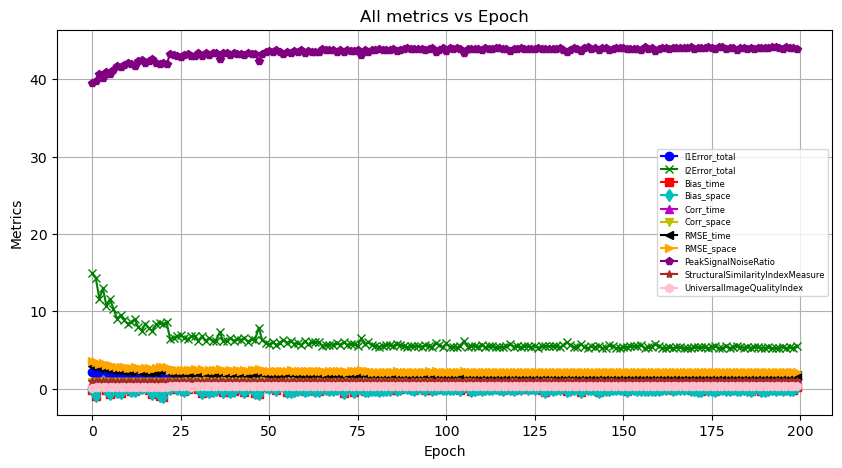

In [33]:
plot_all_metrics(metrics_mse)

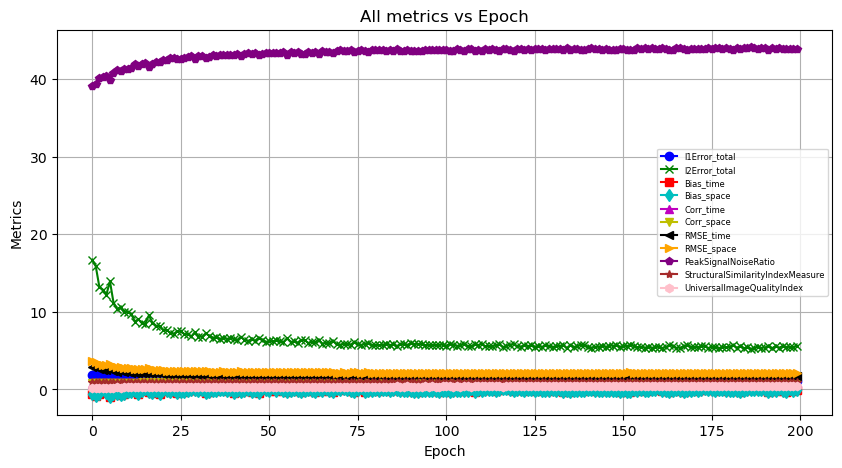

In [34]:
plot_all_metrics(metrics_mae)

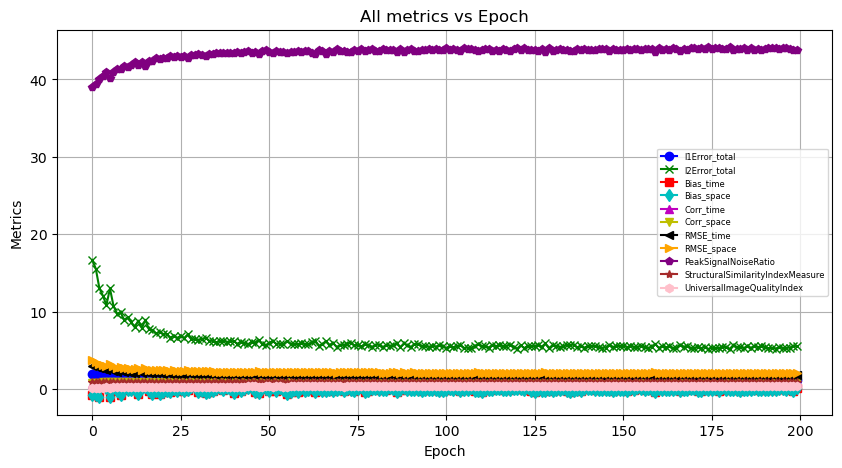

In [35]:
plot_all_metrics(metrics_hubber)

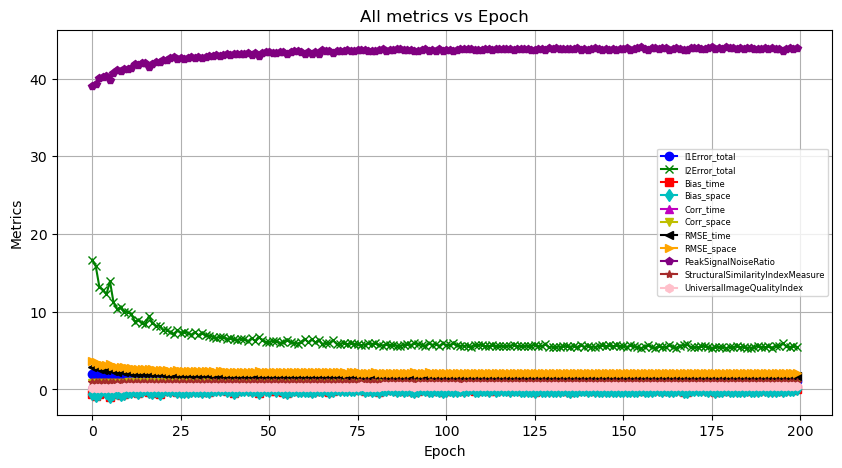

In [36]:
plot_all_metrics(metrics_charb)

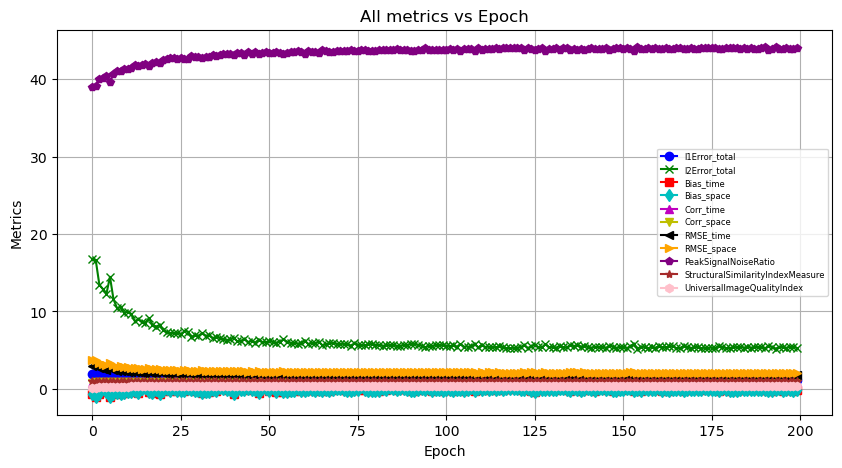

In [37]:
plot_all_metrics(metrics_charb_grad)

In [38]:
columns = metrics_mse.columns
for i, col in enumerate(columns):
    print(i, col)

0 l1Error_total
1 l2Error_total
2 Bias_time
3 Bias_space
4 Corr_time
5 Corr_space
6 RMSE_time
7 RMSE_space
8 PeakSignalNoiseRatio
9 StructuralSimilarityIndexMeasure
10 UniversalImageQualityIndex


IndexError: index 11 is out of bounds for axis 0 with size 11

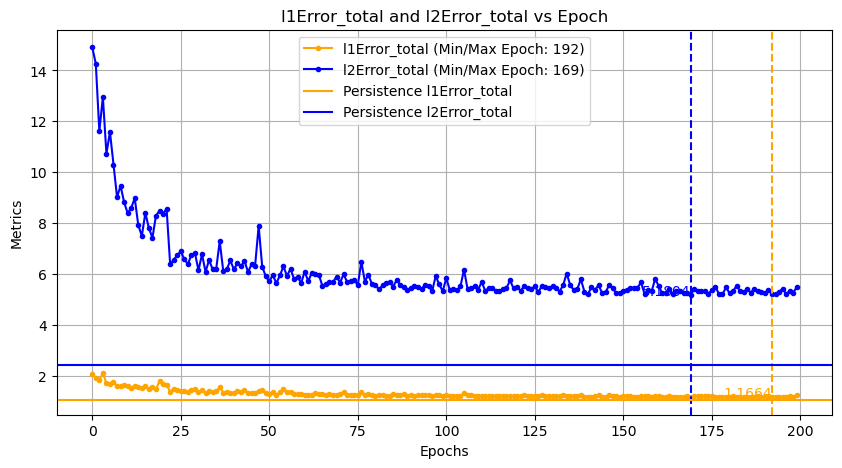

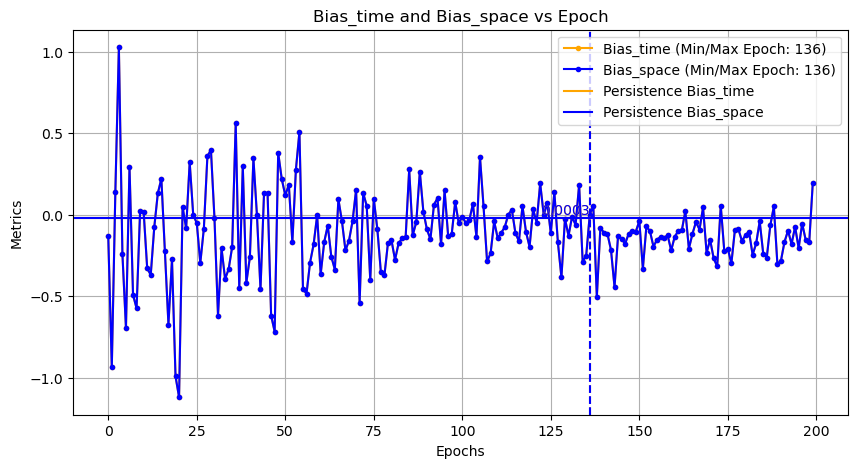

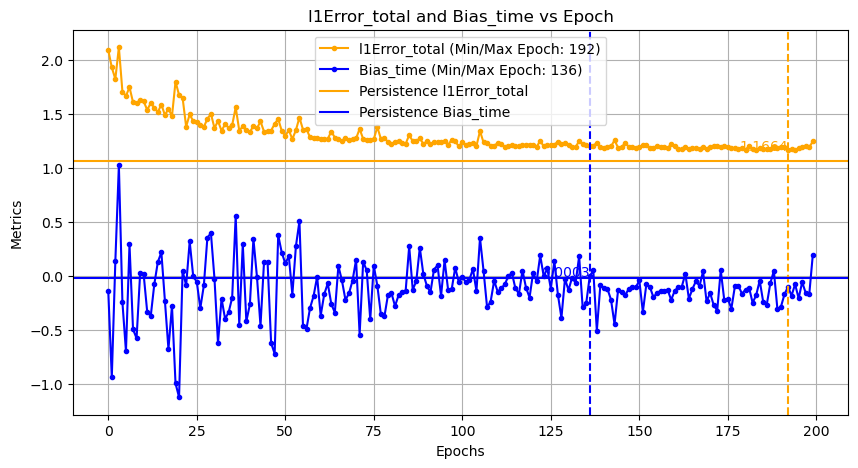

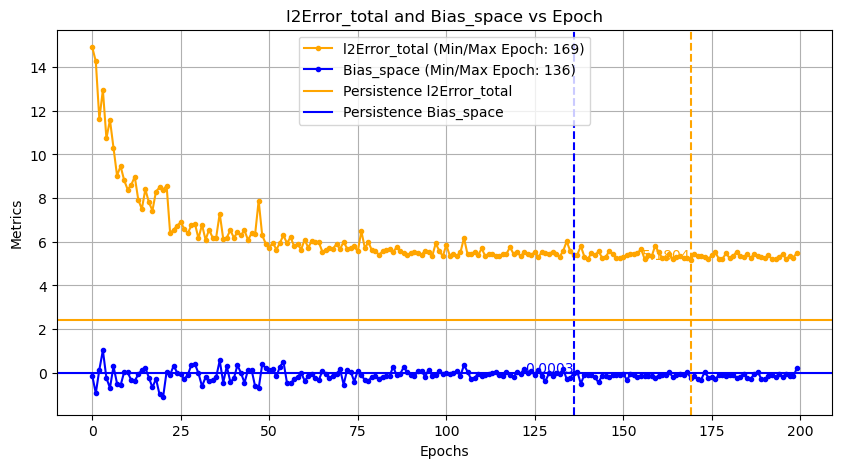

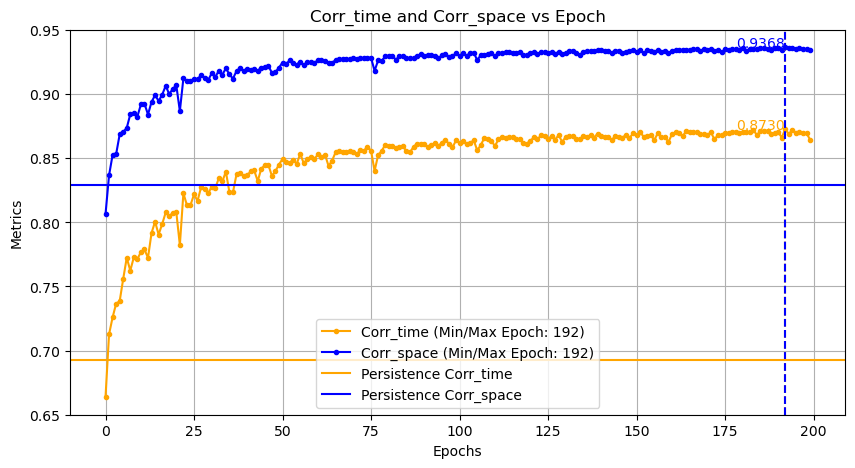

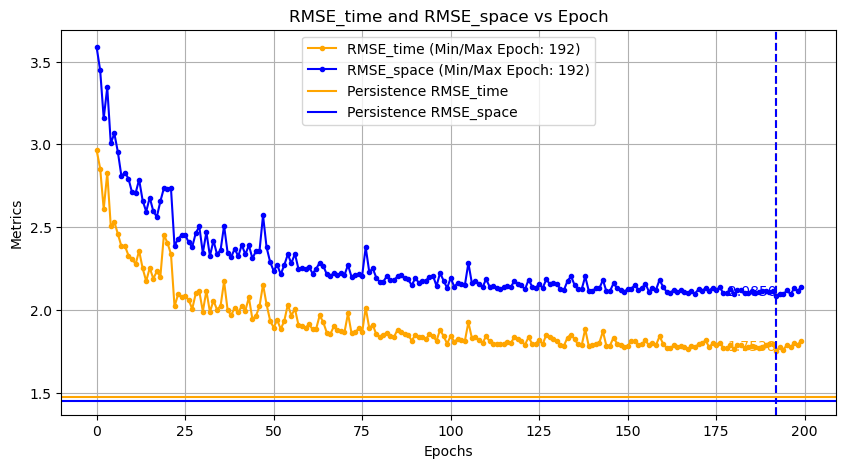

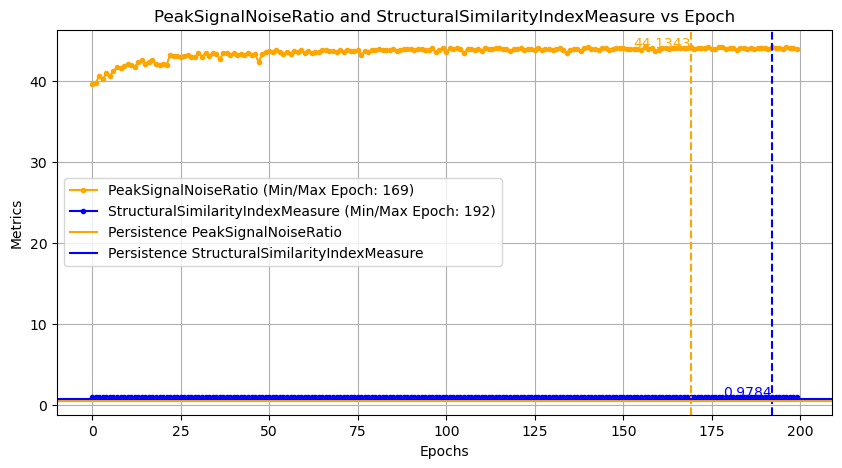

In [39]:
plot_two_metrics(metrics_mse, 0, 1, valid_persistence[columns[0]], valid_persistence[columns[1]], optim_condition[columns[0]])
plot_two_metrics(metrics_mse, 2, 3, valid_persistence[columns[2]], valid_persistence[columns[3]], optim_condition[columns[2]])
plot_two_metrics(metrics_mse, 0, 2, valid_persistence[columns[0]], valid_persistence[columns[2]], optim_condition[columns[0]])
plot_two_metrics(metrics_mse, 1, 3, valid_persistence[columns[1]], valid_persistence[columns[3]], optim_condition[columns[1]])
plot_two_metrics(metrics_mse, 4, 5, valid_persistence[columns[4]], valid_persistence[columns[5]], optim_condition[columns[4]])
plot_two_metrics(metrics_mse, 6, 7, valid_persistence[columns[6]], valid_persistence[columns[7]], optim_condition[columns[6]])
plot_two_metrics(metrics_mse, 8, 9, valid_persistence[columns[8]], valid_persistence[columns[9]], optim_condition[columns[8]])
plot_two_metrics(metrics_mse, 10, 11, valid_persistence[columns[10]], valid_persistence[columns[11]], optim_condition[columns[10]])
plot_two_metrics(metrics_mse, 8, 10, valid_persistence[columns[8]], valid_persistence[columns[10]],optim_condition[columns[8]])
plot_two_metrics(metrics_mse, 9, 11, valid_persistence[columns[9]], valid_persistence[columns[11]], optim_condition[columns[9]])
plot_two_metrics(metrics_mse, 12, 13, valid_persistence[columns[12]], valid_persistence[columns[13]], optim_condition[columns[12]])
plot_two_metrics(metrics_mse, 14, 15, valid_persistence[columns[14]], valid_persistence[columns[15]], optim_condition[columns[14]])
plot_two_metrics(metrics_mse, 12, 14, valid_persistence[columns[12]], valid_persistence[columns[14]], optim_condition[columns[12]])
plot_two_metrics(metrics_mse, 13, 15, valid_persistence[columns[13]], valid_persistence[columns[15]], optim_condition[columns[13]])
plot_two_metrics(metrics_mse, 16, 17, valid_persistence[columns[16]], valid_persistence[columns[17]], optim_condition[columns[16]])
plot_two_metrics(metrics_mse, 16, 16, valid_persistence[columns[16]], valid_persistence[columns[16]], optim_condition[columns[16]])
plot_two_metrics(metrics_mse, 17, 17, valid_persistence[columns[17]], valid_persistence[columns[17]], optim_condition[columns[17]])

In [ ]:
columns = metrics_mae.columns
for i, col in enumerate(columns):
    print(i, col)

In [ ]:
plot_two_metrics(metrics_mae, 0, 1, valid_persistence[columns[0]], valid_persistence[columns[1]], optim_condition[columns[0]])
plot_two_metrics(metrics_mae, 2, 3, valid_persistence[columns[2]], valid_persistence[columns[3]], optim_condition[columns[2]])
plot_two_metrics(metrics_mae, 0, 2, valid_persistence[columns[0]], valid_persistence[columns[2]], optim_condition[columns[0]])
plot_two_metrics(metrics_mae, 1, 3, valid_persistence[columns[1]], valid_persistence[columns[3]], optim_condition[columns[1]])
plot_two_metrics(metrics_mae, 4, 5, valid_persistence[columns[4]], valid_persistence[columns[5]], optim_condition[columns[4]])
plot_two_metrics(metrics_mae, 6, 7, valid_persistence[columns[6]], valid_persistence[columns[7]], optim_condition[columns[6]])
plot_two_metrics(metrics_mae, 8, 9, valid_persistence[columns[8]], valid_persistence[columns[9]], optim_condition[columns[8]])
plot_two_metrics(metrics_mae, 10, 11, valid_persistence[columns[10]], valid_persistence[columns[11]], optim_condition[columns[10]])
plot_two_metrics(metrics_mae, 8, 10, valid_persistence[columns[8]], valid_persistence[columns[10]],optim_condition[columns[8]])
plot_two_metrics(metrics_mae, 9, 11, valid_persistence[columns[9]], valid_persistence[columns[11]], optim_condition[columns[9]])
plot_two_metrics(metrics_mae, 12, 13, valid_persistence[columns[12]], valid_persistence[columns[13]], optim_condition[columns[12]])
plot_two_metrics(metrics_mae, 14, 15, valid_persistence[columns[14]], valid_persistence[columns[15]], optim_condition[columns[14]])
plot_two_metrics(metrics_mae, 12, 14, valid_persistence[columns[12]], valid_persistence[columns[14]], optim_condition[columns[12]])
plot_two_metrics(metrics_mae, 13, 15, valid_persistence[columns[13]], valid_persistence[columns[15]], optim_condition[columns[13]])
plot_two_metrics(metrics_mae, 16, 17, valid_persistence[columns[16]], valid_persistence[columns[17]], optim_condition[columns[16]])
plot_two_metrics(metrics_mae, 16, 16, valid_persistence[columns[16]], valid_persistence[columns[16]], optim_condition[columns[16]])
plot_two_metrics(metrics_mae, 17, 17, valid_persistence[columns[17]], valid_persistence[columns[17]], optim_condition[columns[17]])

In [40]:
columns = metrics_hubber.columns
for i, col in enumerate(columns):
    print(i, col)

0 l1Error_total
1 l2Error_total
2 Bias_time
3 Bias_space
4 Corr_time
5 Corr_space
6 RMSE_time
7 RMSE_space
8 PeakSignalNoiseRatio
9 StructuralSimilarityIndexMeasure
10 UniversalImageQualityIndex


IndexError: index 11 is out of bounds for axis 0 with size 11

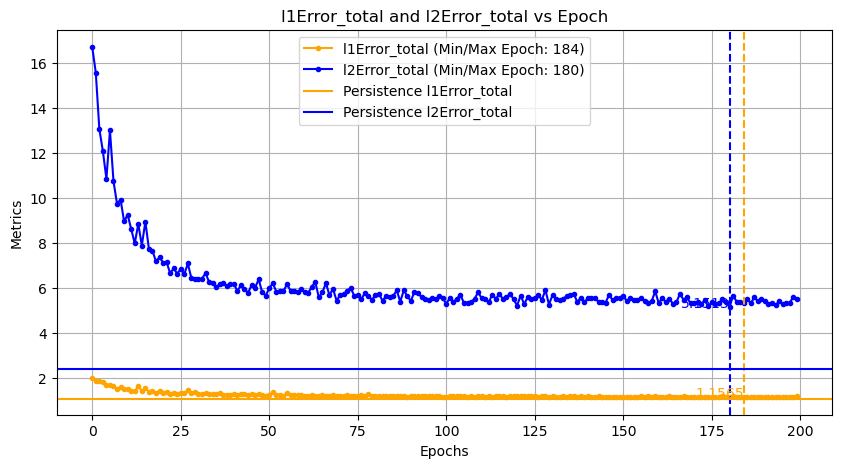

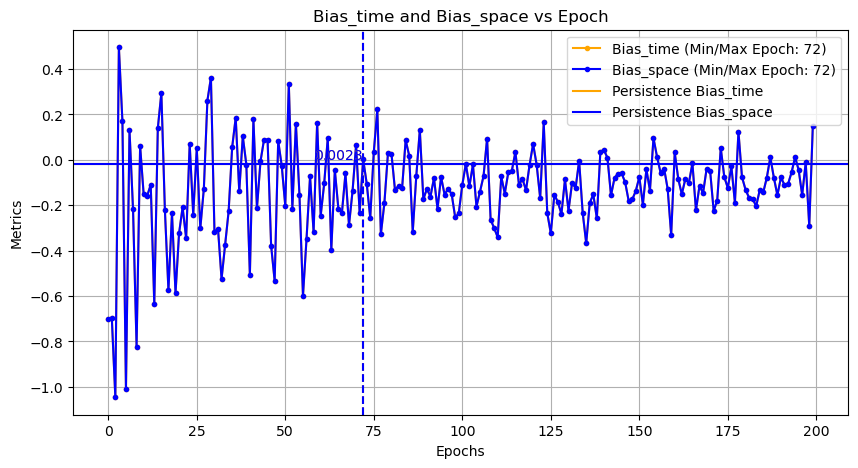

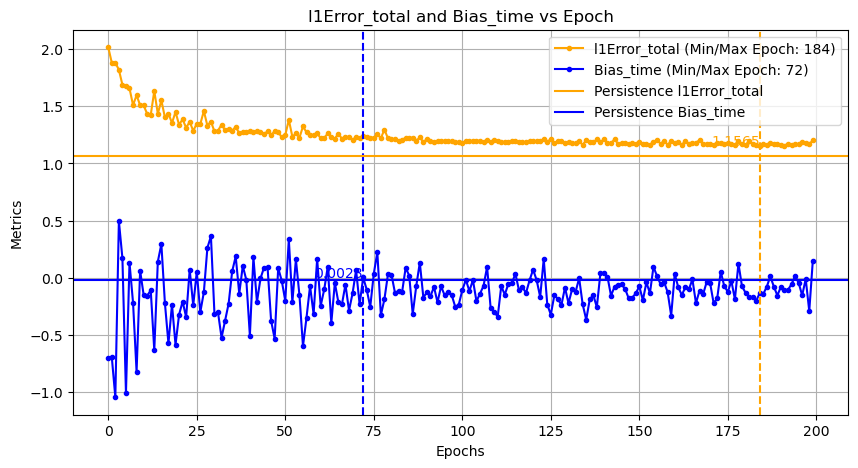

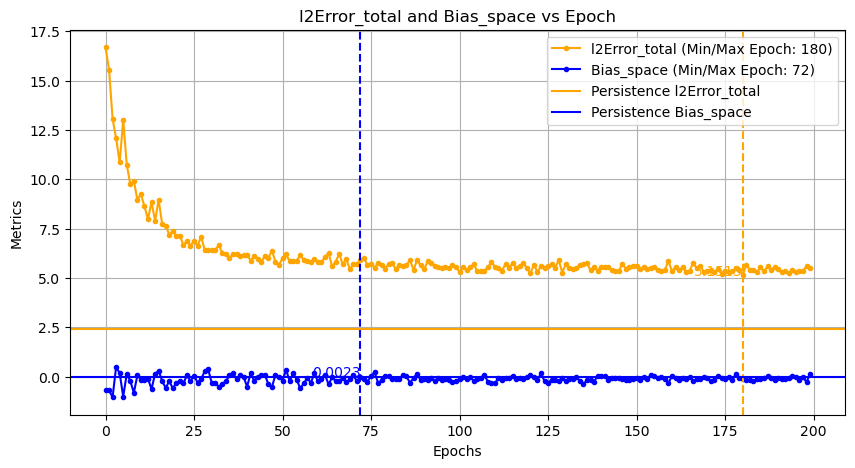

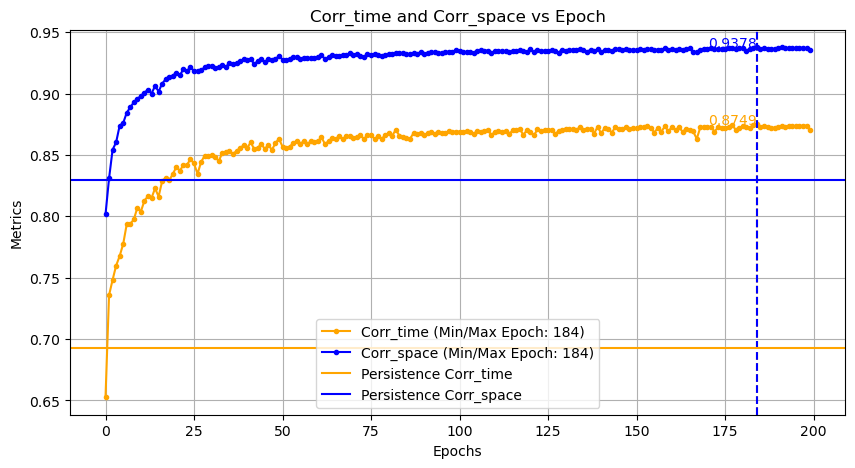

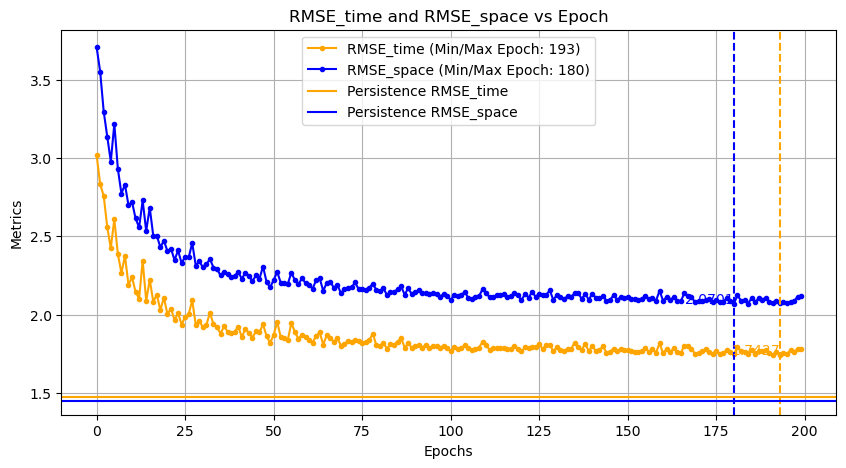

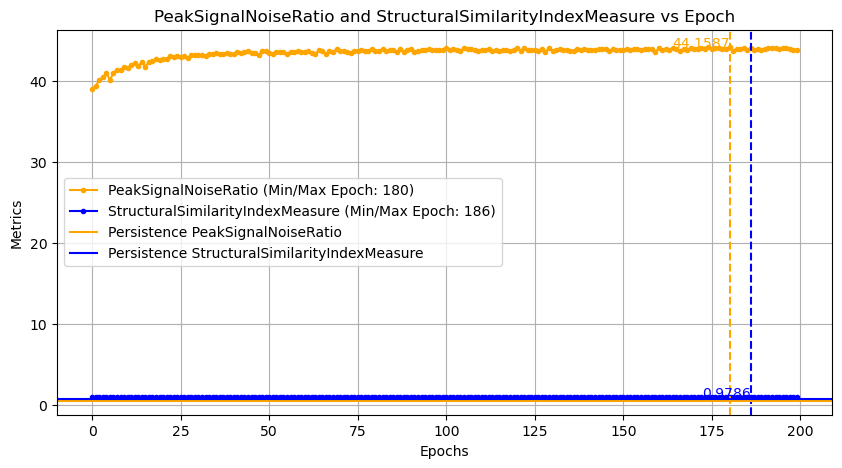

In [41]:
plot_two_metrics(metrics_hubber, 0, 1, valid_persistence[columns[0]], valid_persistence[columns[1]], optim_condition[columns[0]])
plot_two_metrics(metrics_hubber, 2, 3, valid_persistence[columns[2]], valid_persistence[columns[3]], optim_condition[columns[2]])
plot_two_metrics(metrics_hubber, 0, 2, valid_persistence[columns[0]], valid_persistence[columns[2]], optim_condition[columns[0]])
plot_two_metrics(metrics_hubber, 1, 3, valid_persistence[columns[1]], valid_persistence[columns[3]], optim_condition[columns[1]])
plot_two_metrics(metrics_hubber, 4, 5, valid_persistence[columns[4]], valid_persistence[columns[5]], optim_condition[columns[4]])
plot_two_metrics(metrics_hubber, 6, 7, valid_persistence[columns[6]], valid_persistence[columns[7]], optim_condition[columns[6]])
plot_two_metrics(metrics_hubber, 8, 9, valid_persistence[columns[8]], valid_persistence[columns[9]], optim_condition[columns[8]])
plot_two_metrics(metrics_hubber, 10, 11, valid_persistence[columns[10]], valid_persistence[columns[11]], optim_condition[columns[10]])
plot_two_metrics(metrics_hubber, 8, 10, valid_persistence[columns[8]], valid_persistence[columns[10]],optim_condition[columns[8]])
plot_two_metrics(metrics_hubber, 9, 11, valid_persistence[columns[9]], valid_persistence[columns[11]], optim_condition[columns[9]])
plot_two_metrics(metrics_hubber, 12, 13, valid_persistence[columns[12]], valid_persistence[columns[13]], optim_condition[columns[12]])
plot_two_metrics(metrics_hubber, 14, 15, valid_persistence[columns[14]], valid_persistence[columns[15]], optim_condition[columns[14]])
plot_two_metrics(metrics_hubber, 12, 14, valid_persistence[columns[12]], valid_persistence[columns[14]], optim_condition[columns[12]])
plot_two_metrics(metrics_hubber, 13, 15, valid_persistence[columns[13]], valid_persistence[columns[15]], optim_condition[columns[13]])
plot_two_metrics(metrics_hubber, 16, 17, valid_persistence[columns[16]], valid_persistence[columns[17]], optim_condition[columns[16]])
plot_two_metrics(metrics_hubber, 16, 16, valid_persistence[columns[16]], valid_persistence[columns[16]], optim_condition[columns[16]])
plot_two_metrics(metrics_hubber, 17, 17, valid_persistence[columns[17]], valid_persistence[columns[17]], optim_condition[columns[17]])

In [ ]:
columns = metrics_charb.columns
for i, col in enumerate(columns):
    print(i, col)

IndexError: index 11 is out of bounds for axis 0 with size 11

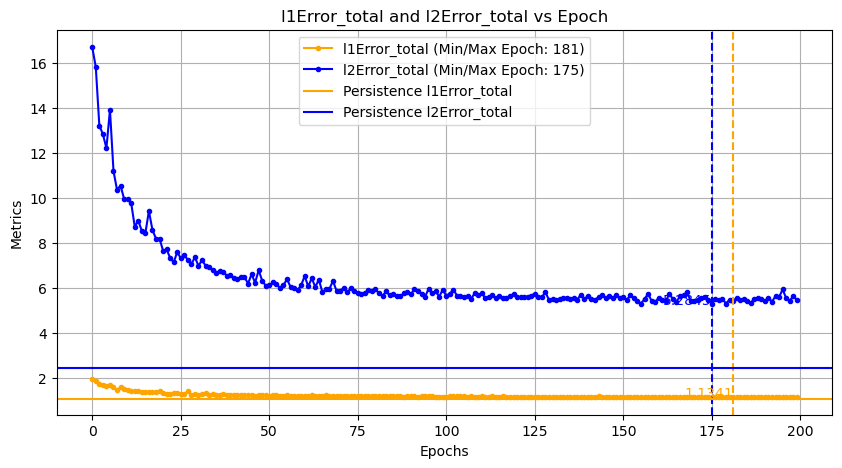

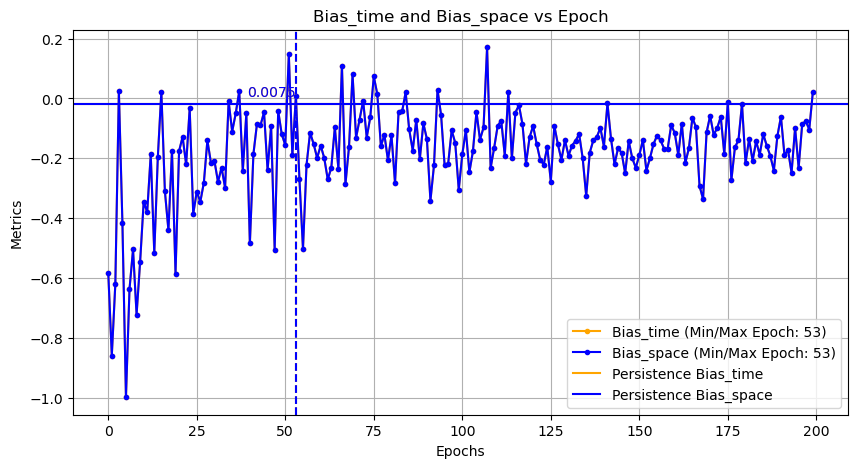

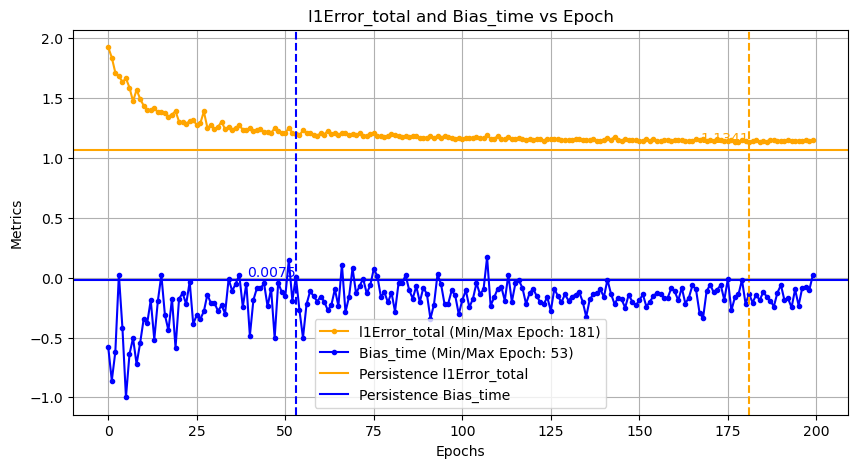

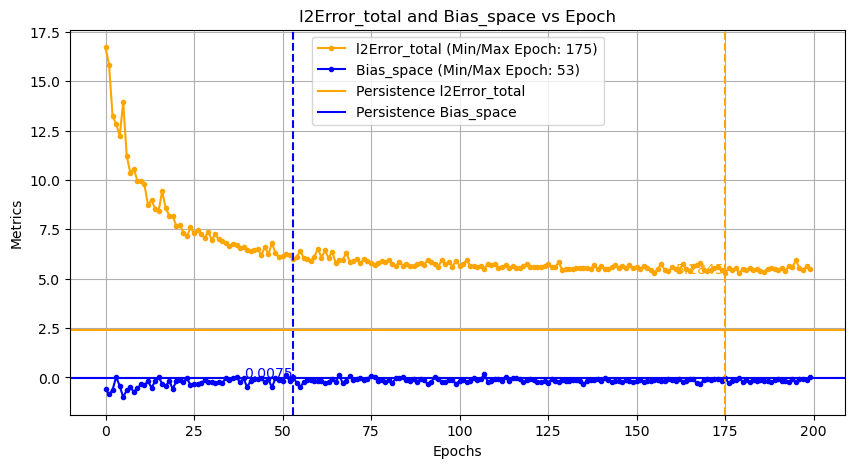

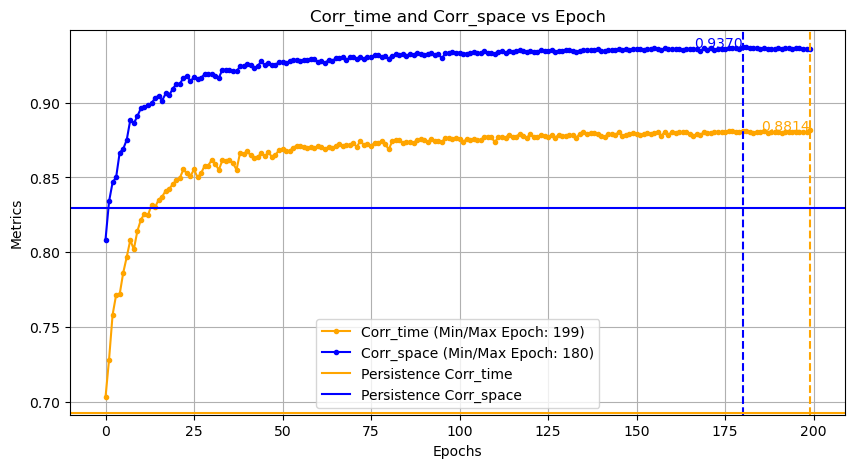

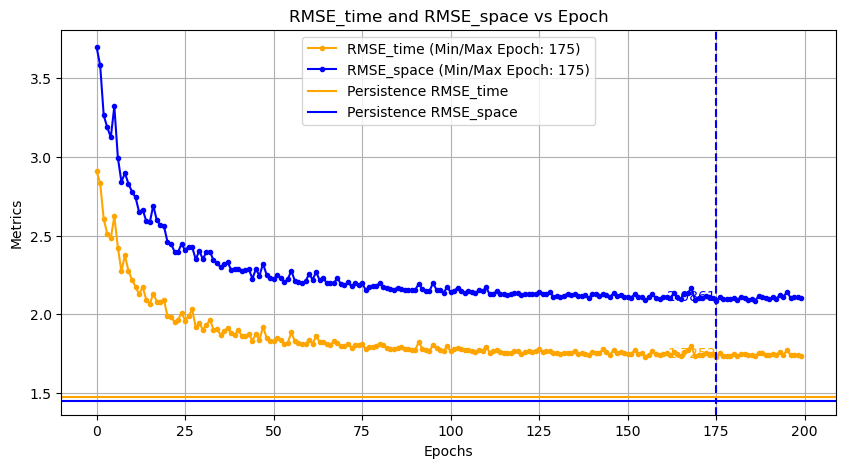

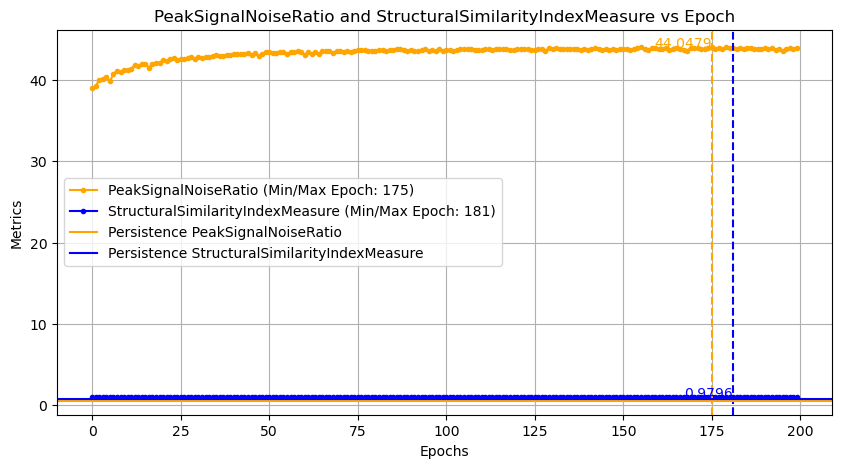

In [26]:
plot_two_metrics(metrics_charb, 0, 1, valid_persistence[columns[0]], valid_persistence[columns[1]], optim_condition[columns[0]])
plot_two_metrics(metrics_charb, 2, 3, valid_persistence[columns[2]], valid_persistence[columns[3]], optim_condition[columns[2]])
plot_two_metrics(metrics_charb, 0, 2, valid_persistence[columns[0]], valid_persistence[columns[2]], optim_condition[columns[0]])
plot_two_metrics(metrics_charb, 1, 3, valid_persistence[columns[1]], valid_persistence[columns[3]], optim_condition[columns[1]])
plot_two_metrics(metrics_charb, 4, 5, valid_persistence[columns[4]], valid_persistence[columns[5]], optim_condition[columns[4]])
plot_two_metrics(metrics_charb, 6, 7, valid_persistence[columns[6]], valid_persistence[columns[7]], optim_condition[columns[6]])
plot_two_metrics(metrics_charb, 8, 9, valid_persistence[columns[8]], valid_persistence[columns[9]], optim_condition[columns[8]])
plot_two_metrics(metrics_charb, 10, 11, valid_persistence[columns[10]], valid_persistence[columns[11]], optim_condition[columns[10]])
plot_two_metrics(metrics_charb, 8, 10, valid_persistence[columns[8]], valid_persistence[columns[10]],optim_condition[columns[8]])
plot_two_metrics(metrics_charb, 9, 11, valid_persistence[columns[9]], valid_persistence[columns[11]], optim_condition[columns[9]])
plot_two_metrics(metrics_charb, 12, 13, valid_persistence[columns[12]], valid_persistence[columns[13]], optim_condition[columns[12]])
plot_two_metrics(metrics_charb, 14, 15, valid_persistence[columns[14]], valid_persistence[columns[15]], optim_condition[columns[14]])
plot_two_metrics(metrics_charb, 12, 14, valid_persistence[columns[12]], valid_persistence[columns[14]], optim_condition[columns[12]])
plot_two_metrics(metrics_charb, 13, 15, valid_persistence[columns[13]], valid_persistence[columns[15]], optim_condition[columns[13]])
plot_two_metrics(metrics_charb, 16, 17, valid_persistence[columns[16]], valid_persistence[columns[17]], optim_condition[columns[16]])
plot_two_metrics(metrics_charb, 16, 16, valid_persistence[columns[16]], valid_persistence[columns[16]], optim_condition[columns[16]])
plot_two_metrics(metrics_charb, 17, 17, valid_persistence[columns[17]], valid_persistence[columns[17]], optim_condition[columns[17]])

In [27]:
columns = metrics_charb_grad.columns
for i, col in enumerate(columns):
    print(i, col)

0 l1Error_total
1 l2Error_total
2 Bias_time
3 Bias_space
4 Corr_time
5 Corr_space
6 RMSE_time
7 RMSE_space
8 PeakSignalNoiseRatio
9 StructuralSimilarityIndexMeasure
10 UniversalImageQualityIndex


IndexError: index 11 is out of bounds for axis 0 with size 11

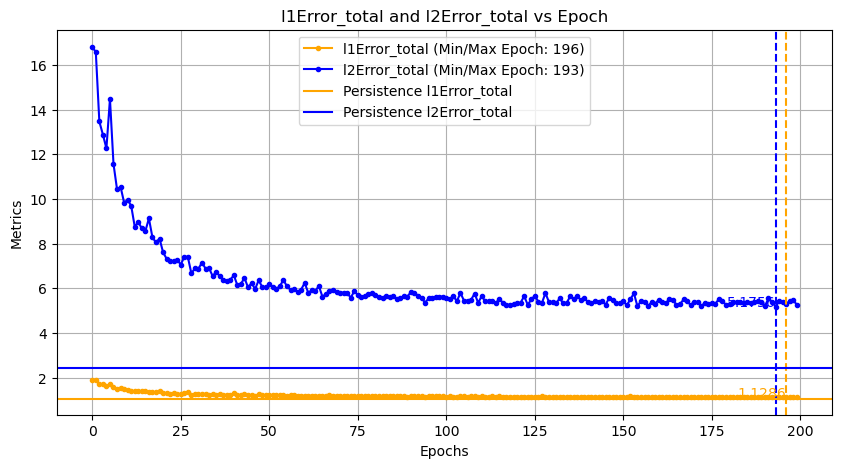

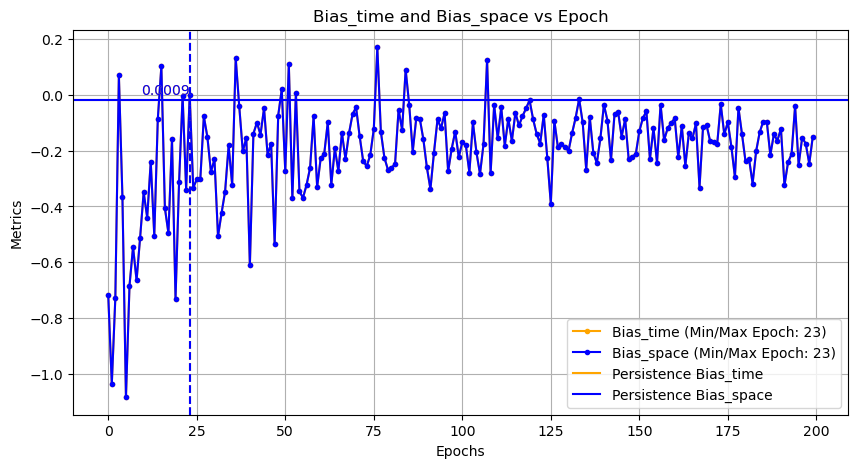

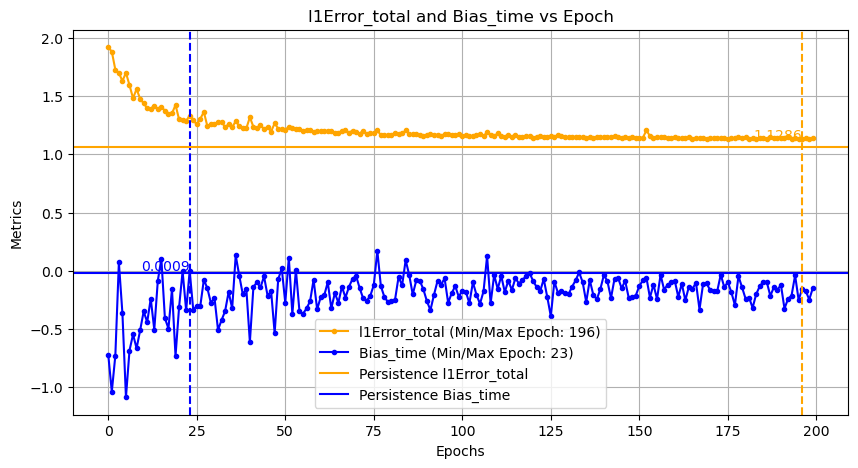

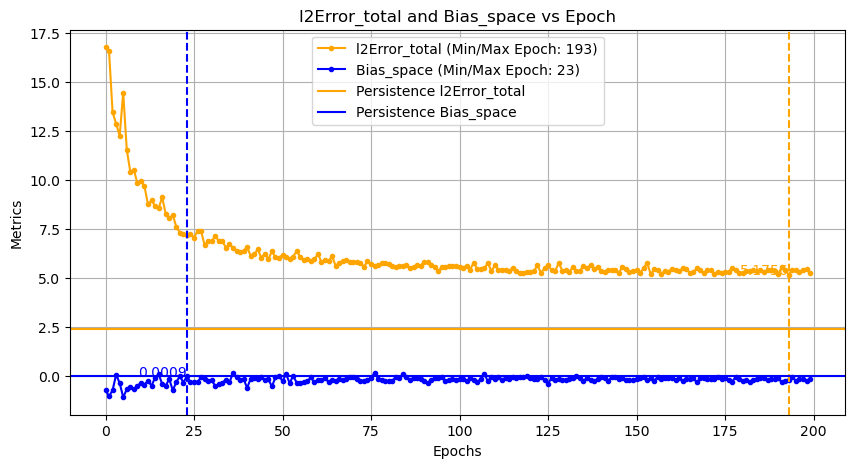

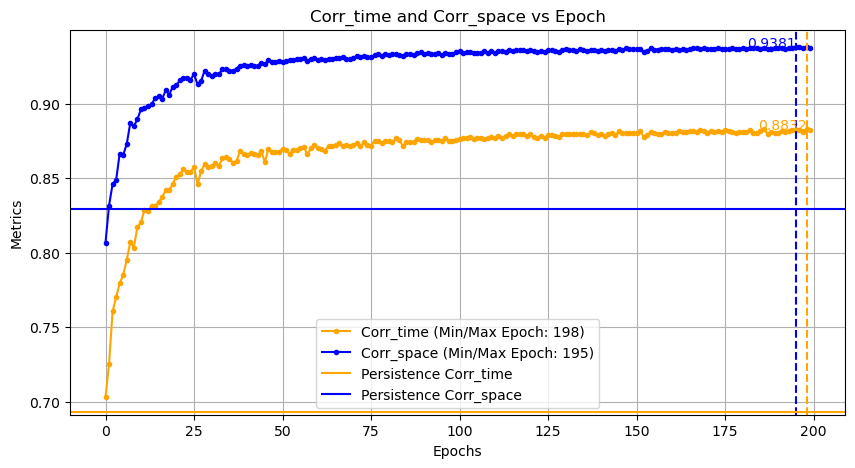

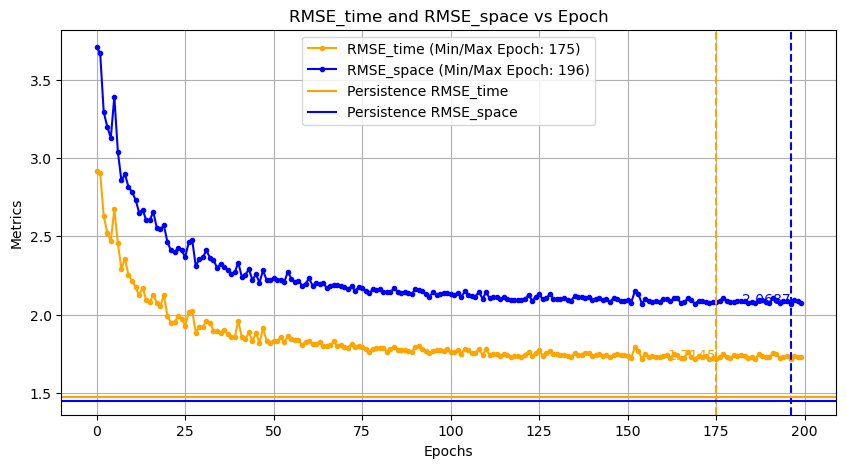

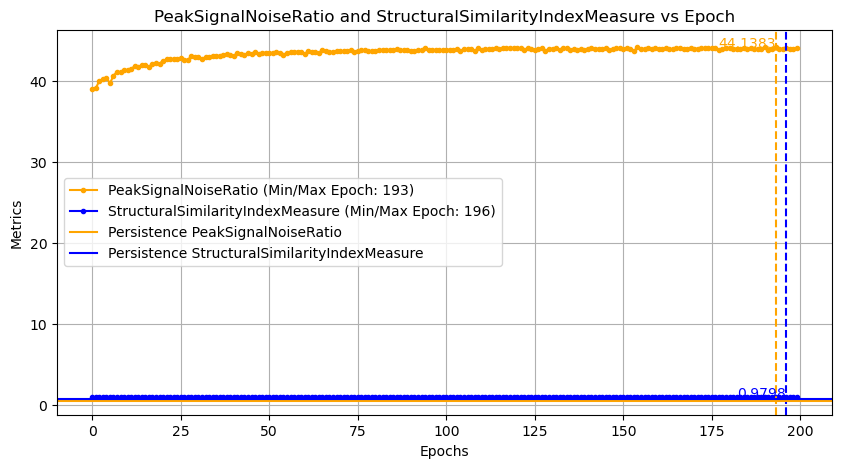

In [42]:
plot_two_metrics(metrics_charb_grad, 0, 1, valid_persistence[columns[0]], valid_persistence[columns[1]], optim_condition[columns[0]])
plot_two_metrics(metrics_charb_grad, 2, 3, valid_persistence[columns[2]], valid_persistence[columns[3]], optim_condition[columns[2]])
plot_two_metrics(metrics_charb_grad, 0, 2, valid_persistence[columns[0]], valid_persistence[columns[2]], optim_condition[columns[0]])
plot_two_metrics(metrics_charb_grad, 1, 3, valid_persistence[columns[1]], valid_persistence[columns[3]], optim_condition[columns[1]])
plot_two_metrics(metrics_charb_grad, 4, 5, valid_persistence[columns[4]], valid_persistence[columns[5]], optim_condition[columns[4]])
plot_two_metrics(metrics_charb_grad, 6, 7, valid_persistence[columns[6]], valid_persistence[columns[7]], optim_condition[columns[6]])
plot_two_metrics(metrics_charb_grad, 8, 9, valid_persistence[columns[8]], valid_persistence[columns[9]], optim_condition[columns[8]])
plot_two_metrics(metrics_charb_grad, 10, 11, valid_persistence[columns[10]], valid_persistence[columns[11]], optim_condition[columns[10]])
plot_two_metrics(metrics_charb_grad, 8, 10, valid_persistence[columns[8]], valid_persistence[columns[10]],optim_condition[columns[8]])
plot_two_metrics(metrics_charb_grad, 9, 11, valid_persistence[columns[9]], valid_persistence[columns[11]], optim_condition[columns[9]])
plot_two_metrics(metrics_charb_grad, 12, 13, valid_persistence[columns[12]], valid_persistence[columns[13]], optim_condition[columns[12]])
plot_two_metrics(metrics_charb_grad, 14, 15, valid_persistence[columns[14]], valid_persistence[columns[15]], optim_condition[columns[14]])
plot_two_metrics(metrics_charb_grad, 12, 14, valid_persistence[columns[12]], valid_persistence[columns[14]], optim_condition[columns[12]])
plot_two_metrics(metrics_charb_grad, 13, 15, valid_persistence[columns[13]], valid_persistence[columns[15]], optim_condition[columns[13]])
plot_two_metrics(metrics_charb_grad, 16, 17, valid_persistence[columns[16]], valid_persistence[columns[17]], optim_condition[columns[16]])
plot_two_metrics(metrics_charb_grad, 16, 16, valid_persistence[columns[16]], valid_persistence[columns[16]], optim_condition[columns[16]])
plot_two_metrics(metrics_charb_grad, 17, 17, valid_persistence[columns[17]], valid_persistence[columns[17]], optim_condition[columns[17]])

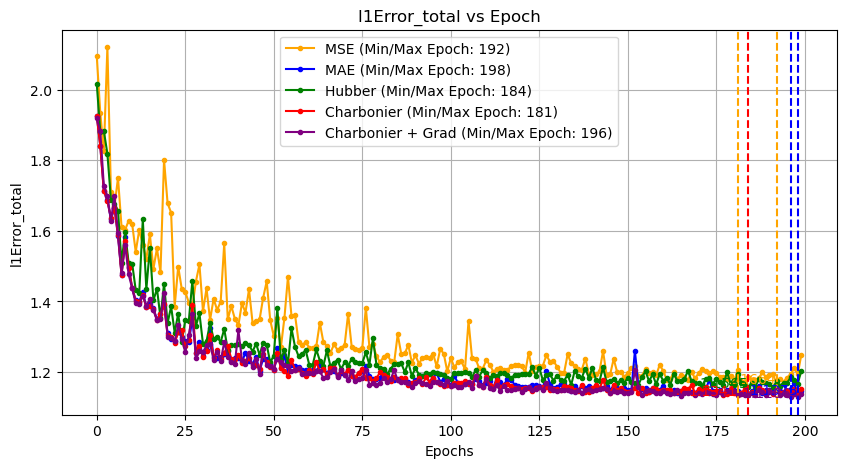

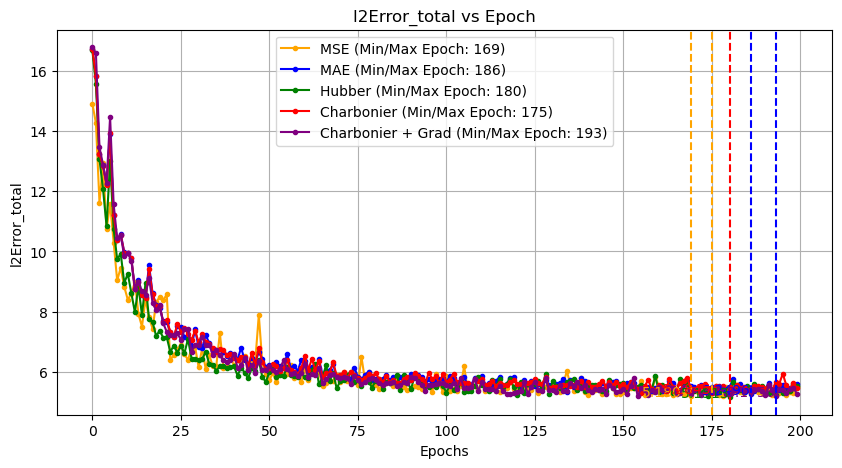

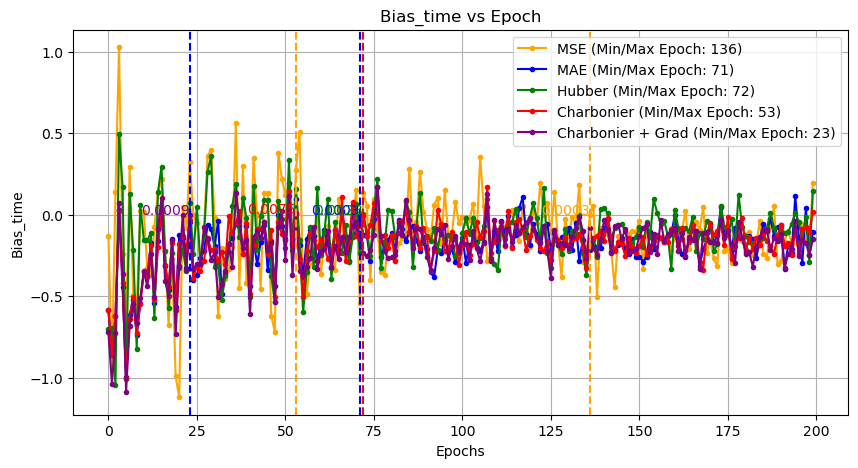

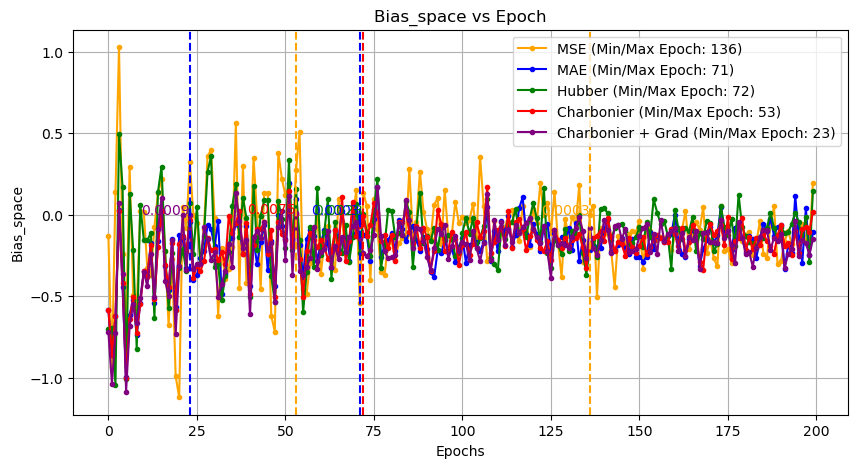

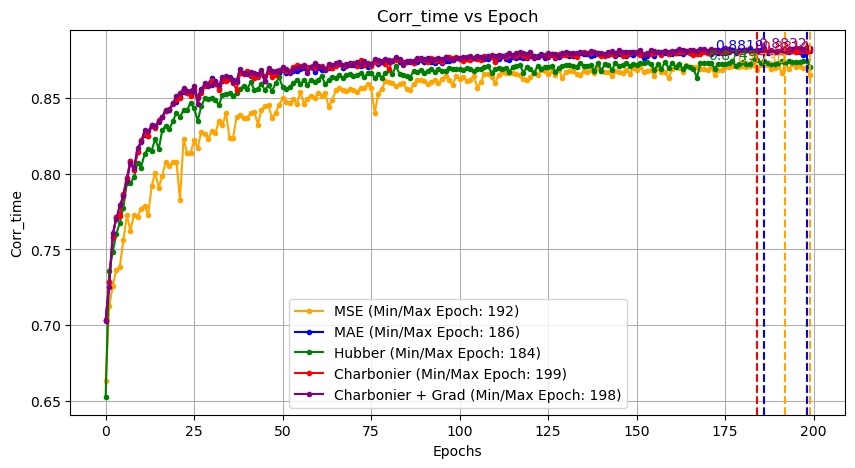

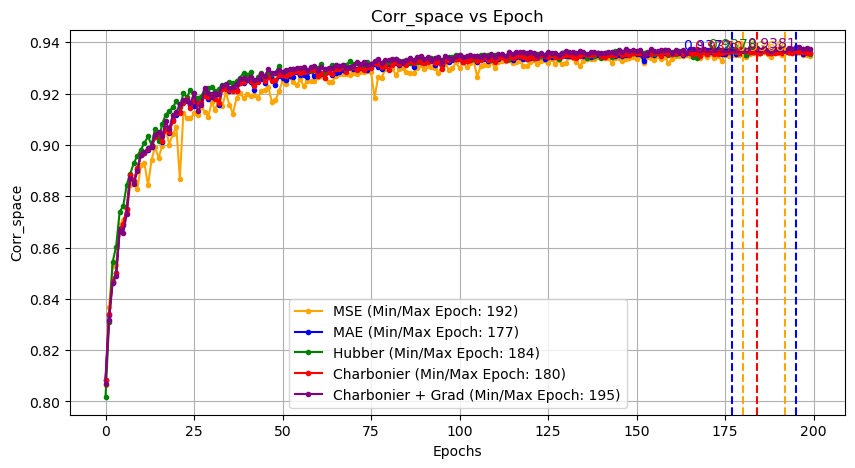

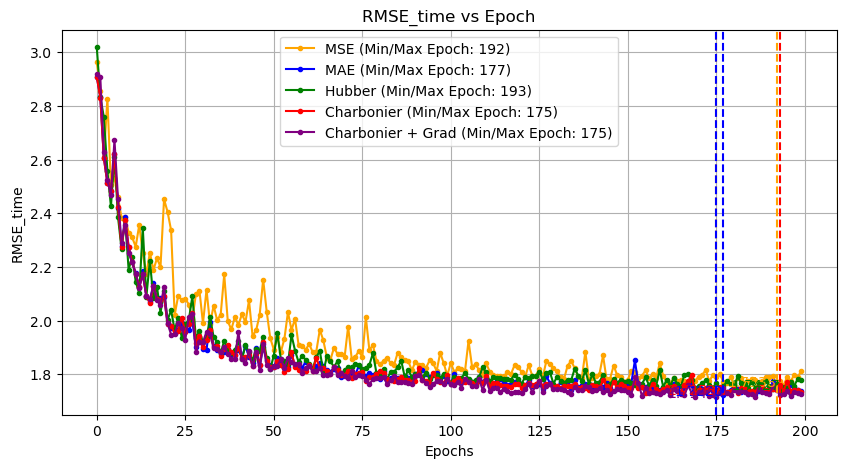

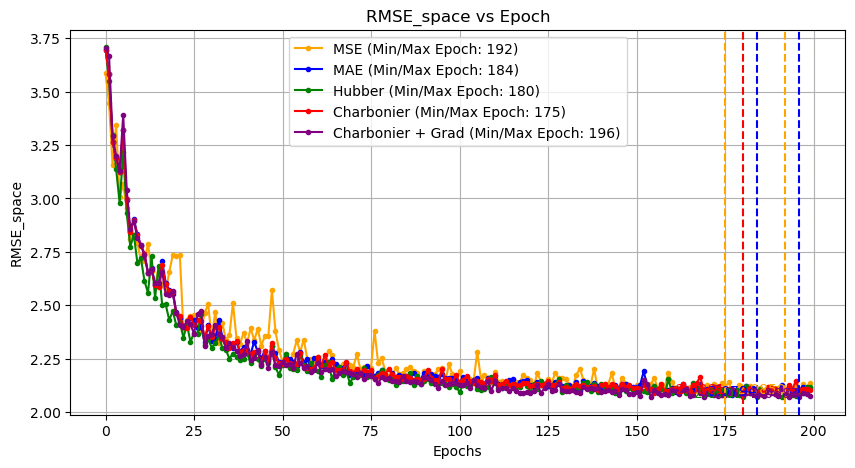

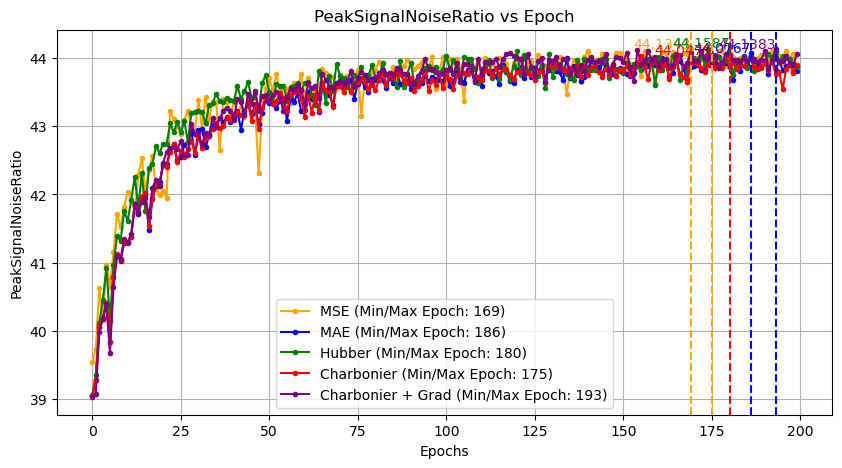

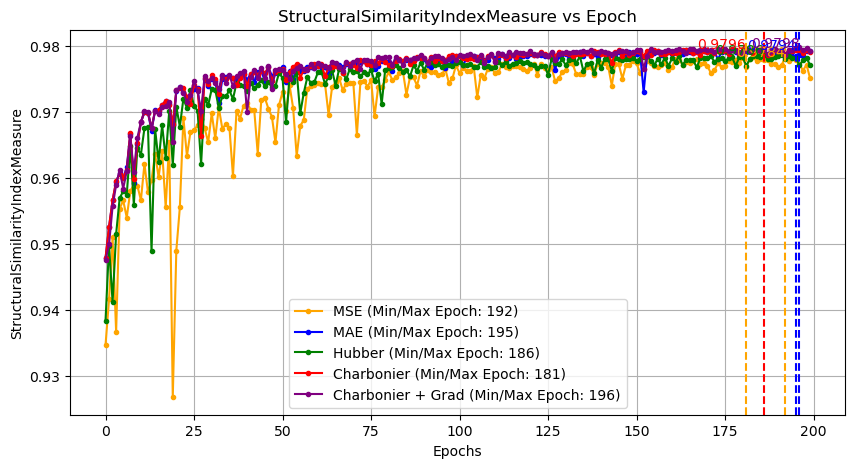

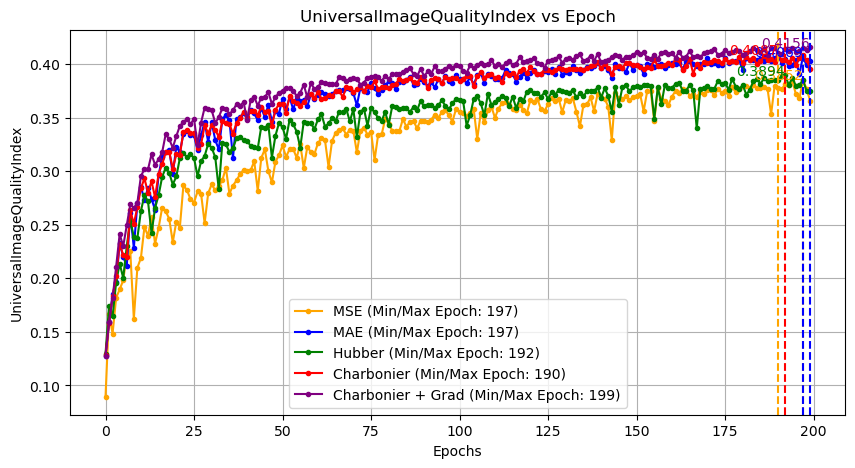

In [43]:
for i in range(len(metrics_mse.columns)):
    comparison(metrics_mse, metrics_mae, metrics_hubber, metrics_charb, metrics_charb_grad, i, valid_persistence[columns[i]], optim_condition[columns[i]], add_persistence=False)


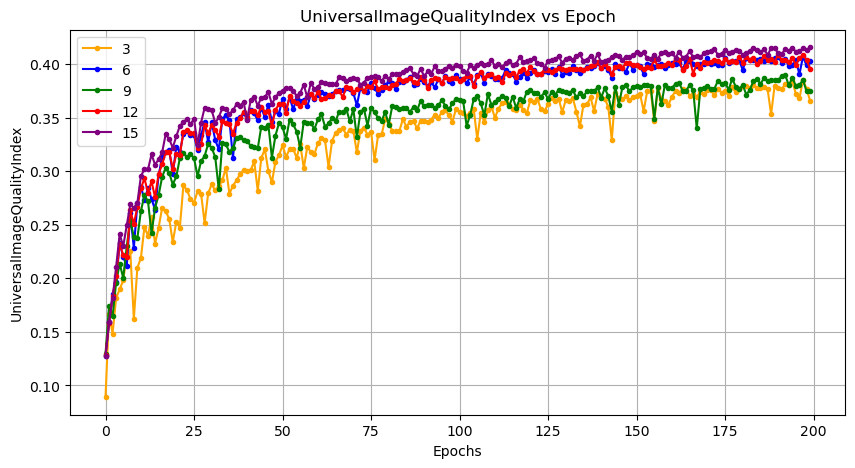

In [30]:
comparison_all(metrics_mse, metrics_mae, metrics_hubber, metrics_charb, metrics_charb_grad, valid_persistence, False)

In [46]:
metrics_total = [metrics_mse, metrics_mae, metrics_hubber, metrics_charb, metrics_charb_grad]

Frames_predict = ['MSE', 'MAE', 'Hubber', 'Charbonier', 'Charbonier + Grad']

min_epochs = []

for metrics in metrics_list:
    min_index = metrics["l1Error_total"].idxmin()
    min_epochs.append(min_index)

min_epochs

[192, 198, 184, 181, 196]

In [47]:
#min_epochs = [10, 10, 10, 50, 30, 10, 10, 10]
#min_epochs = [10, 30, 40, 50, 30, 30, 10, 10]


metrics_best = [metric.loc[epoch] for metric, epoch in zip(metrics_total, min_epochs)]

metrics_best = pd.DataFrame(metrics_best)
metrics_best["epoch"] = metrics_best.index

metrics_best.index = Frames_predict

metrics_best.head(10)

l1Error_total  l2Error_total  Bias_time  Bias_space  \
MSE                     1.166449       5.208928  -0.097130   -0.097130   
MAE                     1.137296       5.457880  -0.243948   -0.243948   
Hubber                  1.156486       5.317318  -0.133862   -0.133862   
Charbonier              1.134096       5.422978  -0.136115   -0.136115   
Charbonier + Grad       1.128564       5.304632  -0.152732   -0.152732   

                   Corr_time  Corr_space  RMSE_time  RMSE_space  \
MSE                 0.872963    0.936783   1.753836    2.084958   
MAE                 0.880641    0.936572   1.740824    2.095949   
Hubber              0.874852    0.937812   1.747955    2.070134   
Charbonier          0.881100    0.936818   1.731734    2.089742   
Charbonier + Grad   0.882754    0.938041   1.718645    2.068723   

                   PeakSignalNoiseRatio  StructuralSimilarityIndexMeasure  \
MSE                           44.110443                          0.978390   
MAE                           43.907681                          0.979169   
Hubber                        44.020996                          0.978506   
Charbonier                    43.935543                          0.979582   
Charbonier + Grad             44.031372                          0.979787   

                   UniversalImageQualityIndex  epoch  
MSE                                  0.381280    192  
MAE                                  0.398595    198  
Hubber                               0.386087    184  
Charbonier                           0.406773    181  
Charbonier + Grad                    0.411669    196

In [55]:
def plot_metric_together(df, num1, persistences, mode='min', persistence_bool=False):

    columns = df.columns
    
    var1 = columns[num1]
    pers = list(persistences.values())[num1]

    # Find the minimum/maximum of that metric
    if mode == 'min':
        epoch_1 = df[var1].idxmin()
        value_1 = df[var1].min()

    elif mode == 'max':
        epoch_1 = df[var1].idxmax()
        value_1 = df[var1].max()

    else:
        epoch_1 = 0
        value_1 = 0

    plt.figure(figsize=(10, 5))

    plt.plot(df.index, df[var1], label=f'{var1} (Min/Max Epoch: {epoch_1})', marker='o', color='orange')

    # Add vertical lines where the minimum is found
    plt.axvline(x=epoch_1, color='orange', linestyle='--')

    # Add horizontal lines for the persistence value
    if persistence_bool:
        plt.axhline(y=pers, color='orange', linestyle='-', label=f'Persistence {var1}')

    plt.text(epoch_1, value_1, f'{value_1:.4f}', color='orange', ha='right')

    plt.title(f'{columns[num1]} vs Epoch')
    plt.xlabel('Prediction Horizon (h)')
    plt.ylabel(f'{columns[num1]}')
    plt.legend()

    plt.grid(True)

    pdf.savefig()

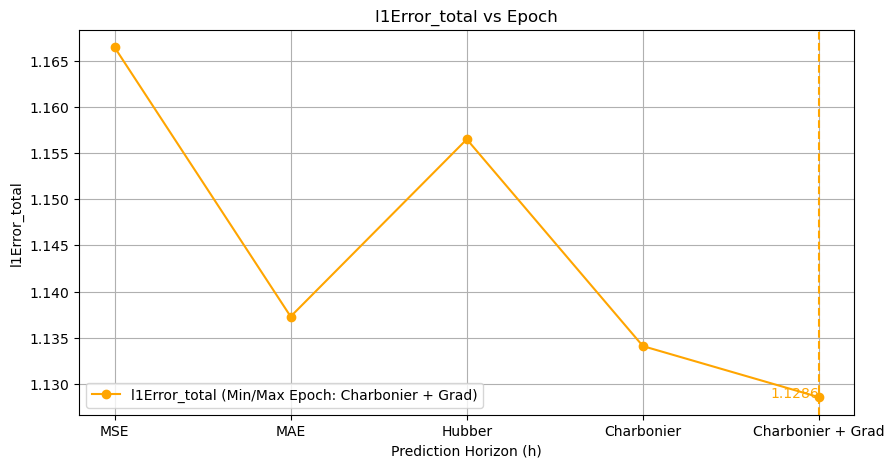

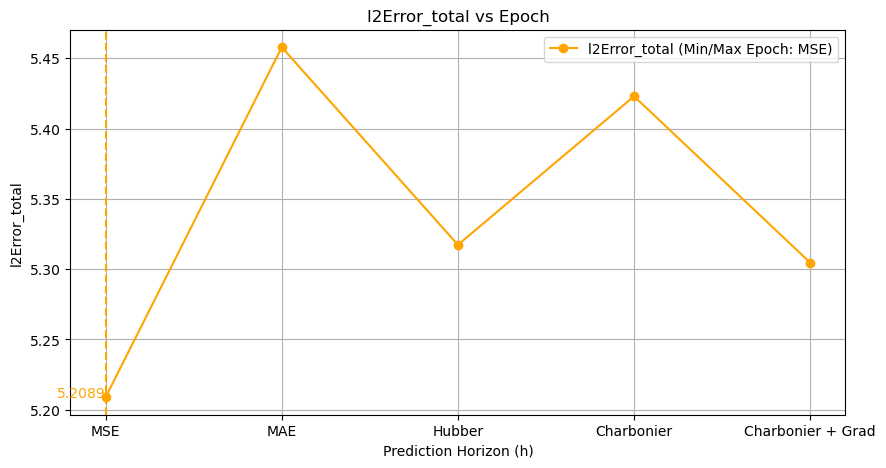

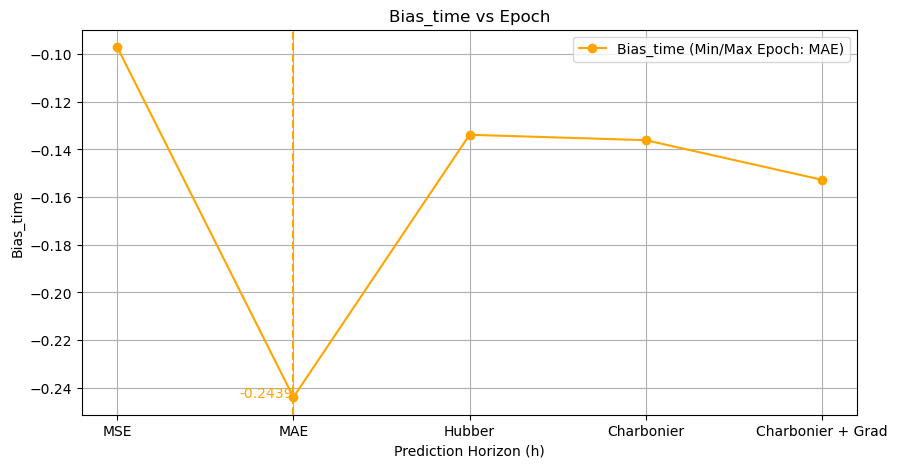

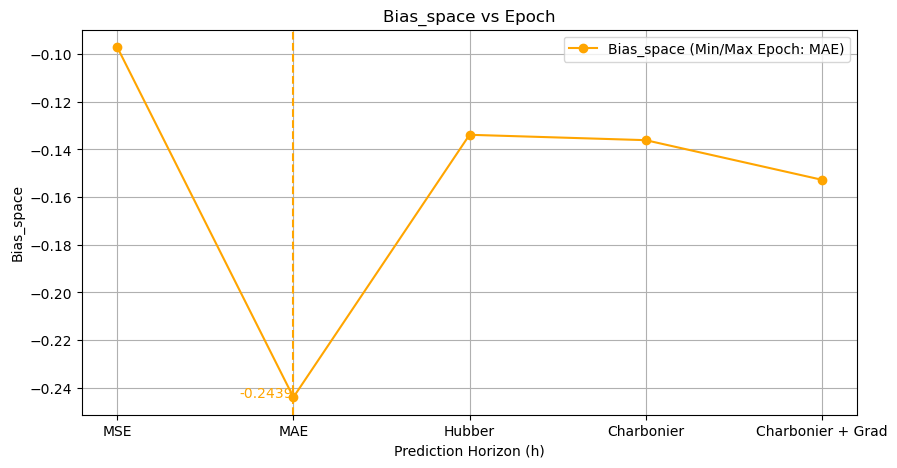

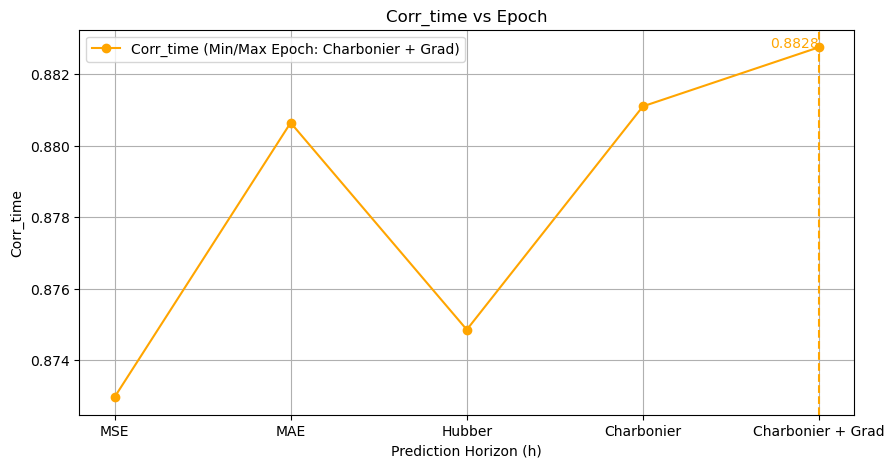

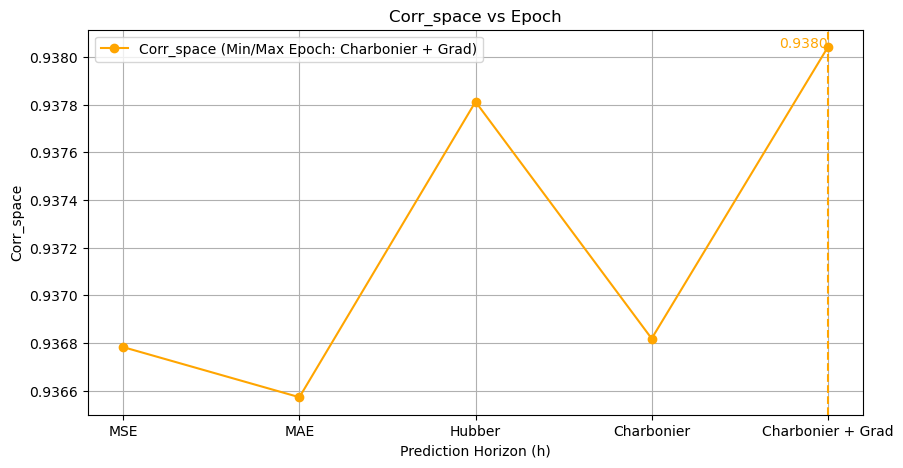

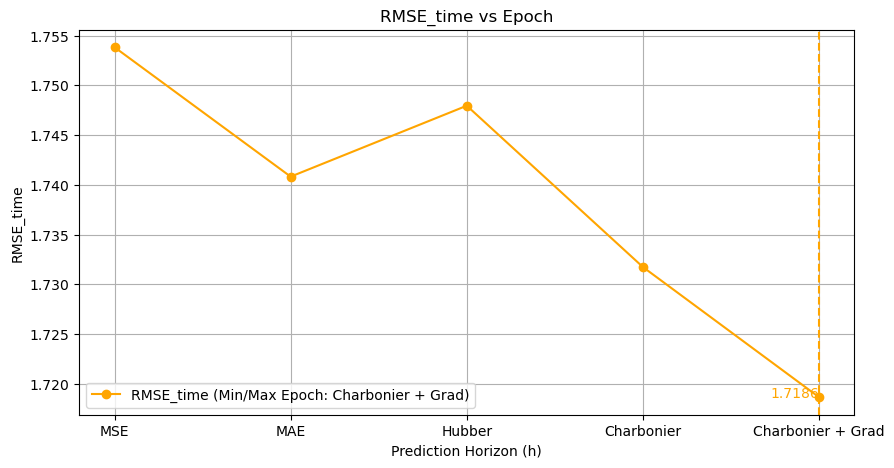

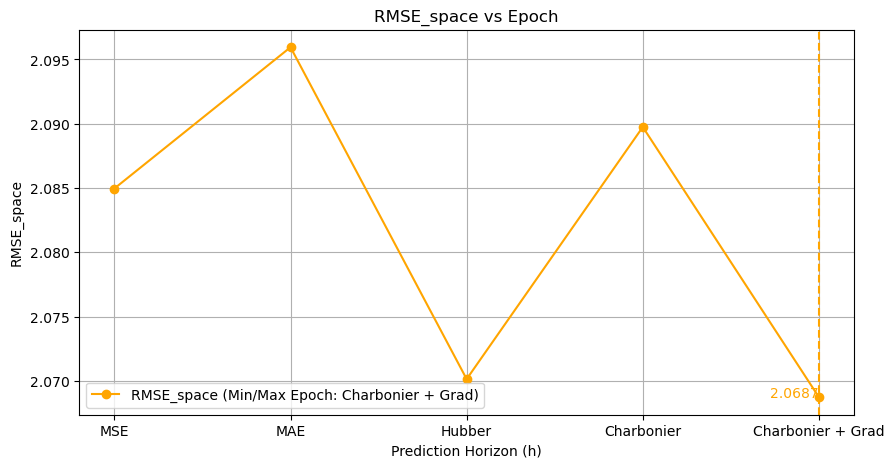

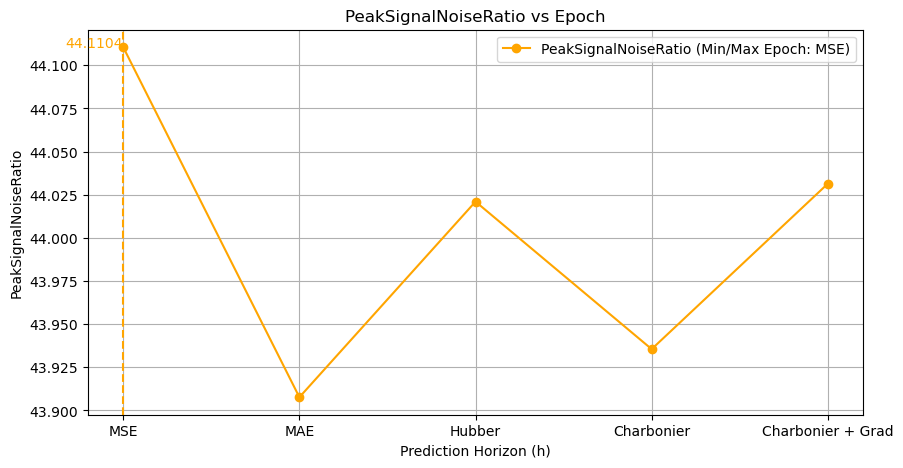

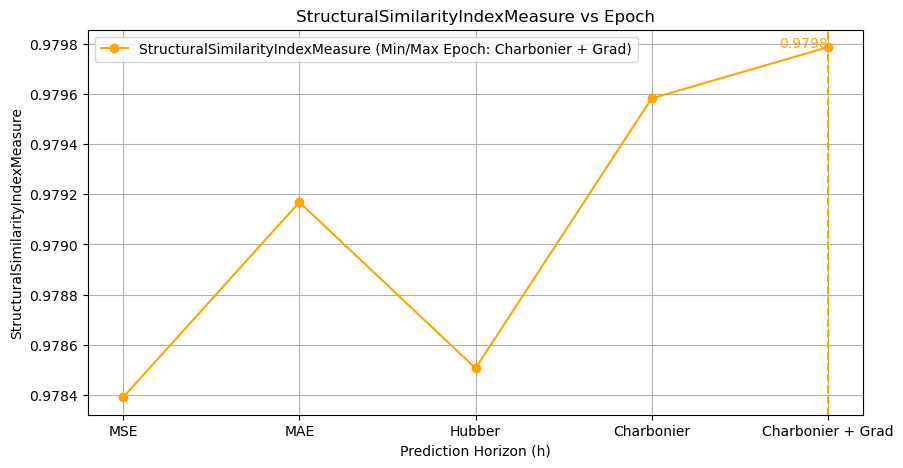

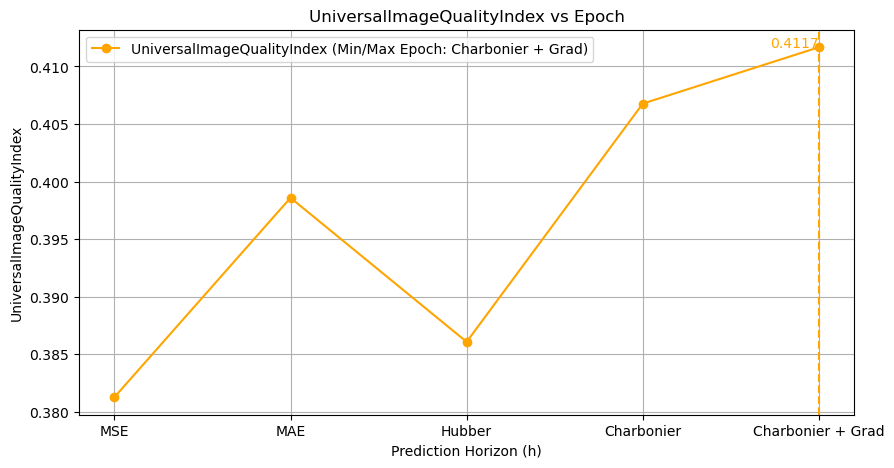

In [58]:
for i in range(len(metrics_mse.columns)):
    plot_metric_together(metrics_best, i, valid_persistence, optim_condition[columns[i]])

In [59]:
import xarray as xr 

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cf

In [68]:
metrics_best['epoch'][0]

/tmp/ipykernel_8898/3049726076.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  metrics_best['epoch'][0]


192

In [77]:
print(f'{metrics_best["epoch"][0]}')
#print(f'metric_space_maps_{metrics_best['epoch']}.nc')

192


/tmp/ipykernel_8898/1252949350.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{metrics_best["epoch"][0]}')


In [82]:
ds_bias_time_3 = xr.open_dataset(os.path.join(mse, f'metric_space_maps_{metrics_best["epoch"][0]:04d}.nc'))
ds_bias_space_3 = xr.open_dataset(os.path.join(path_9, 'bias_map_space_valid.nc'))

ds_corr_time_3 = xr.open_dataset(os.path.join(path_9, 'corr_map_time_valid.nc'))
ds_corr_space_3 = xr.open_dataset(os.path.join(path_9, 'corr_map_space_valid.nc'))

ds_rmse_time_3 = xr.open_dataset(os.path.join(path_9, 'rmse_map_time_valid.nc'))
ds_rmse_space_3 = xr.open_dataset(os.path.join(path_9, 'rmse_map_space_valid.nc'))

min_epoch_3 = 50

/tmp/ipykernel_8898/2284413478.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ds_bias_time_3 = xr.open_dataset(os.path.join(mse, f'metric_space_maps_{metrics_best["epoch"][0]:04d}.nc'))


FileNotFoundError: [Errno 2] No such file or directory: '/home/cide/Documents/5.-Downscaling/downscaling-SwinFSD/AirPollution_Run/Full_Images_200_epochs/output/metrics/valid/metric_space_maps_0192.nc'

In [54]:
bias_time_3 = ds_bias_time_3['bias'].sel(epoch=min_epoch_3)
bias_time_spain_3 = ds_bias_time_3['bias_spain'].sel(epoch=min_epoch_3)
bias_space_3 = ds_bias_space_3['bias'].sel(epoch=min_epoch_3)
bias_space_spain_3 = ds_bias_space_3['bias_spain'].sel(epoch=min_epoch_3)

corr_time_3 = ds_corr_time_3['corr'].sel(epoch=min_epoch_3)
corr_time_spain_3 = ds_corr_time_3['corr_spain'].sel(epoch=min_epoch_3)
corr_space_3 = ds_corr_space_3['corr'].sel(epoch=min_epoch_3)
corr_space_spain_3 = ds_corr_space_3['corr_spain'].sel(epoch=min_epoch_3)

rmse_time_3 = ds_rmse_time_3['rmse'].sel(epoch=min_epoch_3)
rmse_time_spain_3 = ds_rmse_time_3['rmse_spain'].sel(epoch=min_epoch_3)
rmse_space_3 = ds_rmse_space_3['rmse'].sel(epoch=min_epoch_3)
rmse_space_spain_3 = ds_rmse_space_3['rmse_spain'].sel(epoch=min_epoch_3)

In [55]:
ds_bias_time_4 = xr.open_dataset(os.path.join(path_12, 'bias_map_time_valid.nc'))
ds_bias_space_4 = xr.open_dataset(os.path.join(path_12, 'bias_map_space_valid.nc'))

ds_corr_time_4 = xr.open_dataset(os.path.join(path_12, 'corr_map_time_valid.nc'))
ds_corr_space_4 = xr.open_dataset(os.path.join(path_12, 'corr_map_space_valid.nc'))

ds_rmse_time_4 = xr.open_dataset(os.path.join(path_12, 'rmse_map_time_valid.nc'))
ds_rmse_space_4 = xr.open_dataset(os.path.join(path_12, 'rmse_map_space_valid.nc'))

min_epoch_4 = 60

In [56]:
bias_time_4 = ds_bias_time_4['bias'].sel(epoch=min_epoch_4)
bias_time_spain_4 = ds_bias_time_4['bias_spain'].sel(epoch=min_epoch_4)
bias_space_4 = ds_bias_space_4['bias'].sel(epoch=min_epoch_4)
bias_space_spain_4 = ds_bias_space_4['bias_spain'].sel(epoch=min_epoch_4)

corr_time_4 = ds_corr_time_4['corr'].sel(epoch=min_epoch_4)
corr_time_spain_4 = ds_corr_time_4['corr_spain'].sel(epoch=min_epoch_4)
corr_space_4 = ds_corr_space_4['corr'].sel(epoch=min_epoch_4)
corr_space_spain_4 = ds_corr_space_4['corr_spain'].sel(epoch=min_epoch_4)

rmse_time_4 = ds_rmse_time_4['rmse'].sel(epoch=min_epoch_4)
rmse_time_spain_4 = ds_rmse_time_4['rmse_spain'].sel(epoch=min_epoch_4)
rmse_space_4 = ds_rmse_space_4['rmse'].sel(epoch=min_epoch_4)
rmse_space_spain_4 = ds_rmse_space_4['rmse_spain'].sel(epoch=min_epoch_4)

In [57]:
ds_bias_time_5 = xr.open_dataset(os.path.join(path_15, 'bias_map_time_valid.nc'))
ds_bias_space_5 = xr.open_dataset(os.path.join(path_15, 'bias_map_space_valid.nc'))

ds_corr_time_5 = xr.open_dataset(os.path.join(path_15, 'corr_map_time_valid.nc'))
ds_corr_space_5 = xr.open_dataset(os.path.join(path_15, 'corr_map_space_valid.nc'))

ds_rmse_time_5 = xr.open_dataset(os.path.join(path_15, 'rmse_map_time_valid.nc'))
ds_rmse_space_5 = xr.open_dataset(os.path.join(path_15, 'rmse_map_space_valid.nc'))

min_epoch_5 = 70

In [58]:
bias_time_5 = ds_bias_time_5['bias'].sel(epoch=min_epoch_5)
bias_time_spain_5 = ds_bias_time_5['bias_spain'].sel(epoch=min_epoch_5)
bias_space_5 = ds_bias_space_5['bias'].sel(epoch=min_epoch_5)
bias_space_spain_5 = ds_bias_space_5['bias_spain'].sel(epoch=min_epoch_5)

corr_time_5 = ds_corr_time_5['corr'].sel(epoch=min_epoch_5)
corr_time_spain_5 = ds_corr_time_5['corr_spain'].sel(epoch=min_epoch_5)
corr_space_5 = ds_corr_space_5['corr'].sel(epoch=min_epoch_5)
corr_space_spain_5 = ds_corr_space_5['corr_spain'].sel(epoch=min_epoch_5)

rmse_time_5 = ds_rmse_time_5['rmse'].sel(epoch=min_epoch_5)
rmse_time_spain_5 = ds_rmse_time_5['rmse_spain'].sel(epoch=min_epoch_5)
rmse_space_5 = ds_rmse_space_5['rmse'].sel(epoch=min_epoch_5)
rmse_space_spain_5 = ds_rmse_space_5['rmse_spain'].sel(epoch=min_epoch_5)

In [ ]:
print('Comparison Bias')
print('Min: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(bias_time_3.min().item(), 4), '\t\t', np.round(bias_time_4.min().item(), 4), '\t\t', np.round(bias_time_5.min().item(), 4))
print('time_spain:', '\t', np.round(bias_time_spain_3.min().item(), 4), '\t\t', np.round(bias_time_spain_4.min().item(), 4), '\t\t', np.round(bias_time_spain_5.min().item(), 4))
print('space:', '\t\t', np.round(bias_space_3.min().item(), 4), '\t\t', np.round(bias_space_4.min().item(), 4), '\t\t', np.round(bias_space_5.min().item(), 4))
print('space_spain:', '\t', np.round(bias_space_spain_3.min().item(), 4), '\t\t', np.round(bias_space_spain_4.min().item(), 4), '\t\t', np.round(bias_space_spain_5.min().item(), 4))

print()
print('Max: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(bias_time_3.max().item(), 4), '\t\t', np.round(bias_time_4.max().item(), 4), '\t\t', np.round(bias_time_5.max().item(), 4))
print('time_spain:', '\t', np.round(bias_time_spain_3.max().item(), 4), '\t\t', np.round(bias_time_spain_4.max().item(), 4), '\t\t', np.round(bias_time_spain_5.max().item(), 4))
print('space:', '\t\t', np.round(bias_space_3.max().item(), 4), '\t\t', np.round(bias_space_4.max().item(), 4), '\t\t', np.round(bias_space_5.max().item(), 4))
print('space_spain:', '\t', np.round(bias_space_spain_3.max().item(), 4), '\t\t', np.round(bias_space_spain_4.max().item(), 4), '\t\t', np.round(bias_space_spain_5.max().item(), 4))


print()
print('Mean: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(bias_time_3.mean().item(), 4), '\t\t', np.round(bias_time_4.mean().item(), 4), '\t\t', np.round(bias_time_5.mean().item(), 4))
print('time_spain:', '\t', np.round(bias_time_spain_3.mean().item(), 4), '\t\t', np.round(bias_time_spain_4.mean().item(), 4), '\t\t', np.round(bias_time_spain_5.mean().item(), 4))
print('space:', '\t\t', np.round(bias_space_3.mean().item(), 4), '\t\t', np.round(bias_space_4.mean().item(), 4), '\t\t', np.round(bias_space_5.mean().item(), 4))
print('space_spain:', '\t', np.round(bias_space_spain_3.mean().item(), 4), '\t\t', np.round(bias_space_spain_4.mean().item(), 4), '\t\t', np.round(bias_space_spain_5.mean().item(), 4), )

print()
print('STD: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(bias_time_3.std().item(), 4), '\t\t', np.round(bias_time_4.std().item(), 4), '\t\t', np.round(bias_time_5.std().item(), 4))
print('time_spain:', '\t', np.round(bias_time_spain_3.std().item(), 4), '\t\t', np.round(bias_time_spain_4.std().item(), 4), '\t\t', np.round(bias_time_spain_5.std().item(), 4))
print('space:', '\t\t', np.round(bias_space_3.std().item(), 4), '\t\t', np.round(bias_space_4.std().item(), 4), '\t\t', np.round(bias_space_5.std().item(), 4))
print('space_spain:', '\t', np.round(bias_space_spain_3.std().item(), 4), '\t\t', np.round(bias_space_spain_4.std().item(), 4), '\t\t', np.round(bias_space_spain_5.std().item(), 4))



In [ ]:
print('Comparison Correlation')
print('Min: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(corr_time_3.min().item(), 4), '\t\t', np.round(corr_time_4.min().item(), 4), '\t\t', np.round(corr_time_5.min().item(), 4))
print('time_spain:', '\t', np.round(corr_time_spain_3.min().item(), 4), '\t\t', np.round(corr_time_spain_4.min().item(), 4), '\t\t', np.round(corr_time_spain_5.min().item(), 4))
print('space:', '\t\t', np.round(corr_space_3.min().item(), 4), '\t\t', np.round(corr_space_4.min().item(), 4), '\t\t', np.round(corr_space_5.min().item(), 4))
print('space_spain:', '\t', np.round(corr_space_spain_3.min().item(), 4), '\t\t', np.round(corr_space_spain_4.min().item(), 4), '\t\t', np.round(corr_space_spain_5.min().item(), 4))

print()
print('Max: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(corr_time_3.max().item(), 4), '\t\t', np.round(corr_time_4.max().item(), 4), '\t\t', np.round(corr_time_5.max().item(), 4))
print('time_spain:', '\t', np.round(corr_time_spain_3.max().item(), 4), '\t\t', np.round(corr_time_spain_4.max().item(), 4), '\t\t', np.round(corr_time_spain_5.max().item(), 4))
print('space:', '\t\t', np.round(corr_space_3.max().item(), 4), '\t\t', np.round(corr_space_4.max().item(), 4), '\t\t', np.round(corr_space_5.max().item(), 4))
print('space_spain:', '\t', np.round(corr_space_spain_3.max().item(), 4), '\t\t', np.round(corr_space_spain_4.max().item(), 4), '\t\t', np.round(corr_space_spain_5.max().item(), 4))


print()
print('Mean: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(corr_time_3.mean().item(), 4), '\t\t', np.round(corr_time_4.mean().item(), 4), '\t\t', np.round(corr_time_5.mean().item(), 4))
print('time_spain:', '\t', np.round(corr_time_spain_3.mean().item(), 4), '\t\t', np.round(corr_time_spain_4.mean().item(), 4), '\t\t', np.round(corr_time_spain_5.mean().item(), 4))
print('space:', '\t\t', np.round(corr_space_3.mean().item(), 4), '\t\t', np.round(corr_space_4.mean().item(), 4), '\t\t', np.round(corr_space_5.mean().item(), 4))
print('space_spain:', '\t', np.round(corr_space_spain_3.mean().item(), 4), '\t\t', np.round(corr_space_spain_4.mean().item(), 4), '\t\t', np.round(corr_space_spain_5.mean().item(), 4))

print()
print('STD: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(corr_time_3.std().item(), 4), '\t\t', np.round(corr_time_4.std().item(), 4), '\t\t', np.round(corr_time_5.std().item(), 4))
print('time_spain:', '\t', np.round(corr_time_spain_3.std().item(), 4), '\t\t', np.round(corr_time_spain_4.std().item(), 4), '\t\t', np.round(corr_time_spain_5.std().item(), 4))
print('space:', '\t\t', np.round(corr_space_3.std().item(), 4), '\t\t', np.round(corr_space_4.std().item(), 4), '\t\t', np.round(corr_space_5.std().item(), 4))
print('space_spain:', '\t', np.round(corr_space_spain_3.std().item(), 4), '\t\t', np.round(corr_space_spain_4.std().item(), 4), '\t\t', np.round(corr_space_spain_5.std().item(), 4))


In [ ]:
print('Comparison rmse')
print('Min: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(rmse_time_3.min().item(), 4), '\t\t', np.round(rmse_time_4.min().item(), 4), '\t\t', np.round(rmse_time_5.min().item(), 4))
print('time_spain:', '\t', np.round(rmse_time_spain_3.min().item(), 4), '\t\t', np.round(rmse_time_spain_4.min().item(), 4), '\t\t', np.round(rmse_time_spain_5.min().item(), 4))
print('space:', '\t\t', np.round(rmse_space_3.min().item(), 4), '\t\t', np.round(rmse_space_4.min().item(), 4), '\t\t', np.round(rmse_space_5.min().item(), 4))
print('space_spain:', '\t', np.round(rmse_space_spain_3.min().item(), 4), '\t\t', np.round(rmse_space_spain_4.min().item(), 4), '\t\t', np.round(rmse_space_spain_5.min().item(), 4))

print()
print('Max: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(rmse_time_3.max().item(), 4), '\t\t', np.round(rmse_time_4.max().item(), 4), '\t\t', np.round(rmse_time_5.max().item(), 4))
print('time_spain:', '\t', np.round(rmse_time_spain_3.max().item(), 4), '\t\t', np.round(rmse_time_spain_4.max().item(), 4), '\t\t', np.round(rmse_time_spain_5.max().item(), 4))
print('space:', '\t\t', np.round(rmse_space_3.max().item(), 4), '\t\t', np.round(rmse_space_4.max().item(), 4), '\t\t', np.round(rmse_space_5.max().item(), 4))
print('space_spain:', '\t', np.round(rmse_space_spain_3.max().item(), 4), '\t\t', np.round(rmse_space_spain_4.max().item(), 4), '\t\t', np.round(rmse_space_spain_5.max().item(), 4))


print()
print('Mean: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(rmse_time_3.mean().item(), 4), '\t\t', np.round(rmse_time_4.mean().item(), 4), '\t\t', np.round(rmse_time_5.mean().item(), 4))
print('time_spain:', '\t', np.round(rmse_time_spain_3.mean().item(), 4), '\t\t', np.round(rmse_time_spain_4.mean().item(), 4), '\t\t', np.round(rmse_time_spain_5.mean().item(), 4))
print('space:', '\t\t', np.round(rmse_space_3.mean().item(), 4), '\t\t', np.round(rmse_space_4.mean().item(), 4), '\t\t', np.round(rmse_space_5.mean().item(), 4))
print('space_spain:', '\t', np.round(rmse_space_spain_3.mean().item(), 4), '\t\t', np.round(rmse_space_spain_4.mean().item(), 4), '\t\t', np.round(rmse_space_spain_5.mean().item(), 4))

print()
print('STD: ')
print('\t\t', '3', '\t\t\t', '4', '\t\t\t', '5')
print('time:', '\t\t', np.round(rmse_time_3.std().item(), 4), '\t\t', np.round(rmse_time_4.std().item(), 4), '\t\t', np.round(rmse_time_5.std().item(), 4))
print('time_spain:', '\t', np.round(rmse_time_spain_3.std().item(), 4), '\t\t', np.round(rmse_time_spain_4.std().item(), 4), '\t\t', np.round(rmse_time_spain_5.std().item(), 4))
print('space:', '\t\t', np.round(rmse_space_3.std().item(), 4), '\t\t', np.round(rmse_space_4.std().item(), 4), '\t\t', np.round(rmse_space_5.std().item(), 4))
print('space_spain:', '\t', np.round(rmse_space_spain_3.std().item(), 4), '\t\t', np.round(rmse_space_spain_4.std().item(), 4), '\t\t', np.round(rmse_space_spain_5.std().item(), 4))

In [62]:
def plot_time(data1, data2, name, save_as):

    mean_data1 = np.round(data1.mean(skipna=True), 4)
    std_data1 = np.round(data1.std(skipna=True), 4)
    mean_data2 = np.round(data2.mean(skipna=True), 4)
    std_data2 = np.round(data2.std(skipna=True), 4)

    print('Mean data 1: ', mean_data1.values, ' +- ', std_data1.values)
    print('Mean data 2: ', mean_data2.values, ' +- ', std_data2.values)
    
    plt.style.use('default')
        
    #cmap = 'jet'
    cmap = 'viridis'

    #central_lon, central_lat = 11, 48
    extent = [-10.3, 5, 31, 46.4]

    fig, axs = plt.subplots(nrows=1,ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,12))

    axs=axs.flatten()

    for i in range(2):
        #ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))

        axs[i].set_extent(extent)
        #axs[i].gridlines(alpha=0.8)
        gls = axs[i].gridlines(alpha=0.5, draw_labels=True, dms=True)
        gls.right_labels = False
        gls.top_labels = False
        axs[i].coastlines(resolution='10m')
    
    vmin, vmax = data1.min(), data1.max()
    #vmin, vmax = 0.5, 1
    #im0 = axs[0].imshow(data1.isel(time=time), cmap=cmap, interpolation='lanczos', vmin=vmin, vmax=vmax, extent=extent, transform=ccrs.PlateCarree())
    im0 = axs[0].pcolormesh(data1.longitude, data1.latitude, data1.values, cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    cbar0 = plt.colorbar(im0,ax=axs[0],fraction=0.046, pad=0.04)
    cbar0.set_label(label='{}'.format(name),size=14, labelpad=10)
    axs[0].set_title('{:s}_4'.format(name))
    
    if vmin==vmax:
        cbar0.set_ticks([0])
    
    #vmin, vmax = 0, 5
    vmin, vmax = data2.min(), data2.max()
    #im1 = axs[1].imshow(data2.isel(time=time), cmap=cmap, interpolation='lanczos', vmin=vmin, vmax=vmax, extent=extent, transform=ccrs.PlateCarree())
    im1 = axs[1].pcolormesh(data2.longitude, data2.latitude, data2.values, cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    cbar1 = plt.colorbar(im1,ax=axs[1],fraction=0.046, pad=0.04)
    cbar1.set_label(label='rmse [ms$^{-1}$]',size=14, labelpad=10)
    axs[1].set_title('{:s}_5'.format(name))

    if vmin==vmax:
        cbar1.set_ticks([1])
        
    if save_as!=None: 
        plt.savefig(save_as)
    
    pdf.savefig()
    
    plt.show()
    plt.close()
    return

In [63]:
def plot_diff_time(data1, data2, name, save_as):

    data = data1 - data2

    mean_data = np.round(data.mean(skipna=True), 4)
    std_data = np.round(data.std(skipna=True), 4)

    print('Mean diff data: ', mean_data.values, ' +- ', std_data.values)
    
    plt.style.use('default')
        
    #cmap = 'jet'
    cmap = 'viridis'

    #central_lon, central_lat = 11, 48
    extent = [-10.3, 5, 31, 46.4]

    fig, axs = plt.subplots(nrows=1,ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(6,8))

    #ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
    
    axs.set_extent(extent)
    #axs.gridlines(alpha=0.8)
    gls = axs.gridlines(alpha=0.5, draw_labels=True, dms=True)
    gls.right_labels = False
    gls.top_labels = False
    axs.coastlines(resolution='10m')
    
    vmin, vmax = data.min(), data.max()
    #vmin, vmax = 0.5, 1
    #im0 = axs.imshow(data.isel(time=time), cmap=cmap, interpolation='lanczos', vmin=vmin, vmax=vmax, extent=extent, transform=ccrs.PlateCarree())
    im0 = axs.pcolormesh(data.longitude, data.latitude, data.values, cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    cbar0 = plt.colorbar(im0,ax=axs,fraction=0.046, pad=0.04)
    cbar0.set_label(label='Diff_{}'.format(name),size=14, labelpad=10)
    axs.set_title('Diff_{:s}'.format(name))
    
    if vmin==vmax:
        cbar0.set_ticks([0])
        
    if save_as!=None: 
        plt.savefig(save_as)
    
    pdf.savefig()
    
    plt.show()
    plt.close()
    return

In [64]:
def plot_space(data1, data2, name, save_as):
    plt.style.use('default')

    mean_data1 = np.round(data1.mean(skipna=True), 4)
    std_data1 = np.round(data1.std(skipna=True), 4)
    mean_data2 = np.round(data2.mean(skipna=True), 4)
    std_data2 = np.round(data2.std(skipna=True), 4)

    print(mean_data1.values, ' +- ', std_data1.values)
    print(mean_data2.values, ' +- ', std_data2.values)

    fig, axs = plt.subplots(2, figsize=(16,12))

    axs[0].plot(data1.time, data1.values)
    axs[0].axhline(y=mean_data1, color='r', linestyle='--', label='Mean')
    axs[0].set_title(label='{}_4'.format(name),size=14)
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('{}'.format(name))
    
    axs[1].plot(data2.time, data2.values)
    axs[1].axhline(y=mean_data2, color='r', linestyle='--', label='Mean')
    axs[1].set_title(label='{}_5'.format(name), size=14)
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('{}'.format(name))

    if save_as!=None: 
        plt.savefig(save_as)
    
    pdf.savefig()
    
    plt.show()
    plt.close()
    return

In [65]:
def plot_diff_space(data1, data2, name, save_as):
    plt.style.use('default')

    data = data1 - data2

    mean_data = np.round(data.mean(skipna=True), 4)
    std_data = np.round(data.std(skipna=True), 4)

    print(mean_data.values, ' +- ', std_data.values)

    fig, axs = plt.subplots(1, figsize=(16,8))

    axs.plot(data.time, data.values)
    axs.axhline(y=mean_data, color='r', linestyle='--', label='Mean')
    axs.set_title(label='{}'.format(name),size=14)
    axs.set_xlabel('Date')
    axs.set_ylabel('{}'.format(name))

    if save_as!=None: 
        plt.savefig(save_as)
    
    pdf.savefig()
    
    plt.show()
    plt.close()
    return

In [ ]:
print('BIAS TIME')
plot_time(bias_time_3, bias_time_4, 'bias', None)
plot_diff_time(bias_time_3, bias_time_4, 'bias', None)
print('BIAS SPACE')
plot_space(bias_space_3, bias_space_4, 'bias', None)
plot_diff_space(bias_space_3, bias_space_4, 'bias', None)

In [ ]:
print('BIAS TIME SPAIN')
plot_time(bias_time_spain_3, bias_time_spain_4, 'bias', None)
plot_diff_time(bias_time_spain_3, bias_time_spain_4, 'bias', None)
print('BIAS SPACE SPAIN')
plot_space(bias_space_spain_3, bias_space_spain_4, 'bias', None)
plot_diff_space(bias_space_spain_3, bias_space_spain_4, 'bias', None)

In [ ]:
print('CORRELATION TIME')
plot_time(corr_time_3, corr_time_4, 'corr', None)
plot_diff_time(corr_time_3, corr_time_4, 'corr', None)
#print('CORRELATION TIME SPAIN')
#plot_time(corr_time_spain_3, corr_time_spain_4, 'corr', None)
#plot_diff_time(corr_time_spain_3, corr_time_spain_4, 'corr', None)
print('CORRELATION SPACE')
plot_space(corr_space_3, corr_space_4, 'corr', None)
plot_diff_space(corr_space_3, corr_space_4, 'corr', None)
#print('CORRELATION SPACE SPAIN')
#plot_space(corr_space_spain_3, corr_space_spain_4, 'corr', None)
#plot_diff_space(corr_space_spain_3, corr_space_spain_4, 'corr', None)

In [ ]:
print('CORRELATION TIME SPAIN')
plot_time(corr_time_spain_3, corr_time_spain_4, 'corr', None)
plot_diff_time(corr_time_spain_3, corr_time_spain_4, 'corr', None)
print('CORRELATION SPACE SPAIN')
plot_space(corr_space_spain_3, corr_space_spain_4, 'corr', None)
plot_diff_space(corr_space_spain_3, corr_space_spain_4, 'corr', None)

In [ ]:
print('RMSE TIME')
plot_time(rmse_time_3, rmse_time_4, 'rmse', None)
plot_diff_time(rmse_time_3, rmse_time_4, 'rmse', None)
#print('CORRELATION TIME SPAIN')
#plot_time(rmse_time_spain_3, rmse_time_spain_4, 'rmse', None)
#plot_diff_time(rmse_time_spain_3, rmse_time_spain_4, 'rmse', None)
print('RMSE SPACE')
plot_space(rmse_space_3, rmse_space_4, 'rmse', None)
plot_diff_space(rmse_space_3, rmse_space_4, 'rmse', None)
#print('CORRELATION SPACE SPAIN')
#plot_space(rmse_space_spain_3, rmse_space_spain_4, 'rmse', None)
#plot_diff_space(rmse_space_spain_3, rmse_space_spain_4, 'rmse', None)

In [ ]:
print('RMSE TIME SPAIN')
plot_time(rmse_time_spain_3, rmse_time_spain_4, 'rmse', None)
plot_diff_time(rmse_time_spain_3, rmse_time_spain_4, 'rmse', None)

print('RMSE SPACE SPAIN')
plot_space(rmse_space_spain_3, rmse_space_spain_4, 'rmse', None)
plot_diff_space(rmse_space_spain_3, rmse_space_spain_4, 'rmse', None)


In [72]:
pdf.close()